# Libraries and Dependencies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.0 MB/s eta 0:00:00


In [ ]:
import gspread as gs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRLY_n83tpJaqJO1r6zAIE2mziMkk2l7gkg3Vhld3Xi_lkxOtEBId9Ud3OupeV0b-fECTd4jILiSktO/pub?output=csv')
print(len(df))

298


In [ ]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

In [ ]:
df['Artists'].unique()

array(['Azam Khan', 'Rabindranath Tagore', 'Kazi Nazrul Islam', 'Tahsan',
       'Warfaze', 'LRB', 'Andrew Kishore', 'SI Tutul ', 'Miles',
       'Momtaz Begum', 'James', 'Artcell', 'Shironamhin',
       'Bappa Mazumder', 'Shunno', 'Pritom', 'Nachiketa Chakrabarty'],
      dtype=object)

#  Exploratory Data Analysis
Counts and Lenght:

Start by checking how long the lyrics are

    Character count
    Word count
    Mean word length
    Mean sentence length

https://www.kaggle.com/code/harshsingh2209/complete-guide-to-eda-on-text-data#notebook-container

# Counting rows with multiple genre labels

In [ ]:
cnt_mul_genre = 0

for (idx, row) in df.iterrows():
  if (row['Pop'] + row['Rock'] + row['Folk/Urban Folk'] + row['Patriotic'] + row['RabindraSangeet'] + row['NazrulSangeet'] + row['Spiritual']) > 1:
    cnt_mul_genre += 1

print('Songs count with multiple genres: {} ({}%)'.format(str(cnt_mul_genre), str(round(cnt_mul_genre*100/len(df), 2))))

Songs count with multiple genres: 62 (20.81%)


## Checking word distribution

In [ ]:
import re

def get_word_freq(lyrics_list):
  bangla_punctuations = ['।', '‘', '’', '“', '”', '!', '?', ',', '.', ':', ';', '(', ')', '{', '}', '[', ']', '/', '…', '\u200c', '-']
  word_freq = {}

  for lyrics in lyrics_list:
    lyrics = re.sub('(২)', '', lyrics)
    lyrics = re.sub('(x2)', '', lyrics)

    for p in bangla_punctuations:
      lyrics = lyrics.replace(p, '')

    lyrics = lyrics.replace('\n', ' ')

    for word in lyrics.split(' '):
      if word not in word_freq.keys():
        word_freq[word] = 1
      else:
        word_freq[word] += 1

  return sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

In [ ]:
word_freq = get_word_freq(df['Lyrics'])
print(word_freq)

[('', 1531), ('আমি', 554), ('না', 546), ('তুমি', 546), ('আমার', 502), ('তোমার', 398), ('এই', 290), ('কি', 272), ('আর', 238), ('মন', 198), ('যায়', 197), ('যে', 192), ('করে', 187), ('সে', 178), ('আজ', 175), ('এ', 173), ('হয়ে', 173), ('শুধু', 168), ('সেই', 158), ('জীবন', 154), ('যদি', 149), ('কত', 139), ('মনে', 139), ('কেন', 133), ('সব', 131), ('রে', 131), ('এক', 130), ('কোন', 126), ('তোমায়', 115), ('দাও', 114), ('একা', 111), ('কেউ', 110), ('আছে', 103), ('তার', 103), ('চলে', 102), ('দূরে', 100), ('হয়', 99), ('তবু', 99), ('দিন', 97), ('পথে', 96), ('যাবে', 95), ('আমায়', 91), ('কথা', 91), ('রাতে', 91), ('স্বপ্ন', 91), ('নেই', 89), ('ও', 88), ('হবে', 85), ('তো', 84), ('ফিরে', 83), ('যেন', 83), ('তাই', 82), ('মাঝে', 82), ('পথ', 80), ('কে', 78), ('জীবনের', 78), ('রাত', 77), ('পড়ে', 77), ('জ্বালা', 77), ('তোর', 74), ('গান', 72), ('চোখে', 72), ('ঘরে', 71), ('বলে', 70), ('আঁধার', 70), ('আসে', 69), ('থেকে', 69), ('তোমাকে', 69), ('বৃষ্টি', 69), ('মানুষ', 68), ('ভোট', 68), ('নিয়ে', 67), ('থাকা', 66),

In [ ]:
import matplotlib.pyplot as plt

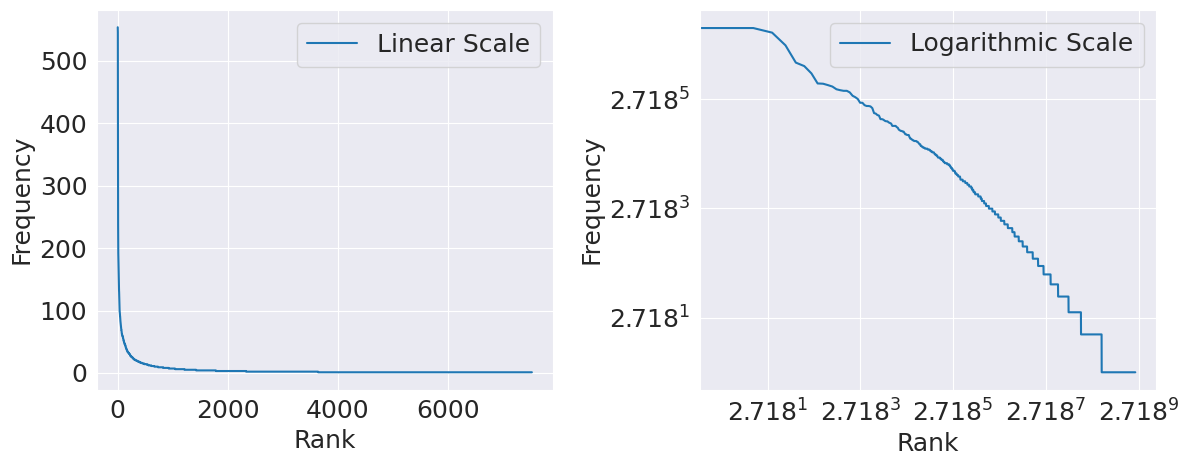

In [ ]:
# # Checking if entire token distribution follows Zipf law
# fig, host = plt.subplots(figsize=(8,5), layout='constrained') # (width, height) in inches
# Create a figure with two subplots (ax1 and ax2)
import math
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# fig.suptitle('Frequency-Ranked Token Distribution of the Dataset')


x = range(len(word_freq)-1)
xlog = [math.log(val+1, 10000) for val in x]
y = [tup[1] for tup in word_freq[1:]]
ylog = [math.log(tup[1], 10000) for tup in word_freq[1:]]

# Plot the data on ax1 (linear scale)
ax1.grid(True)
ax1.plot(x, y, label="Linear Scale")


# Plot the data on ax2 (logarithmic scale)
ax2.grid(True)
ax2.plot(x, y, label="Logarithmic Scale")
ax2.set_xscale('log', base=2.718)
ax2.set_yscale('log', base=2.718)

ax1.set(xlabel='Rank', ylabel='Frequency')
ax2.set(xlabel='Rank', ylabel='Frequency')

# Add legends to subplots
ax1.legend()
ax2.legend()

plt.tight_layout()  # Ensure proper spacing between subplots
plt.savefig('Freq_rank.png')
plt.show()

In [ ]:
from scipy.stats import kstest, wilcoxon, mannwhitneyu

kstest(y, yref) #-> reject null hypothesis
# wilcoxon(y, yref)
mannwhitneyu(ylog, y1)

MannwhitneyuResult(statistic=9282.5, pvalue=4.672263085322528e-05)

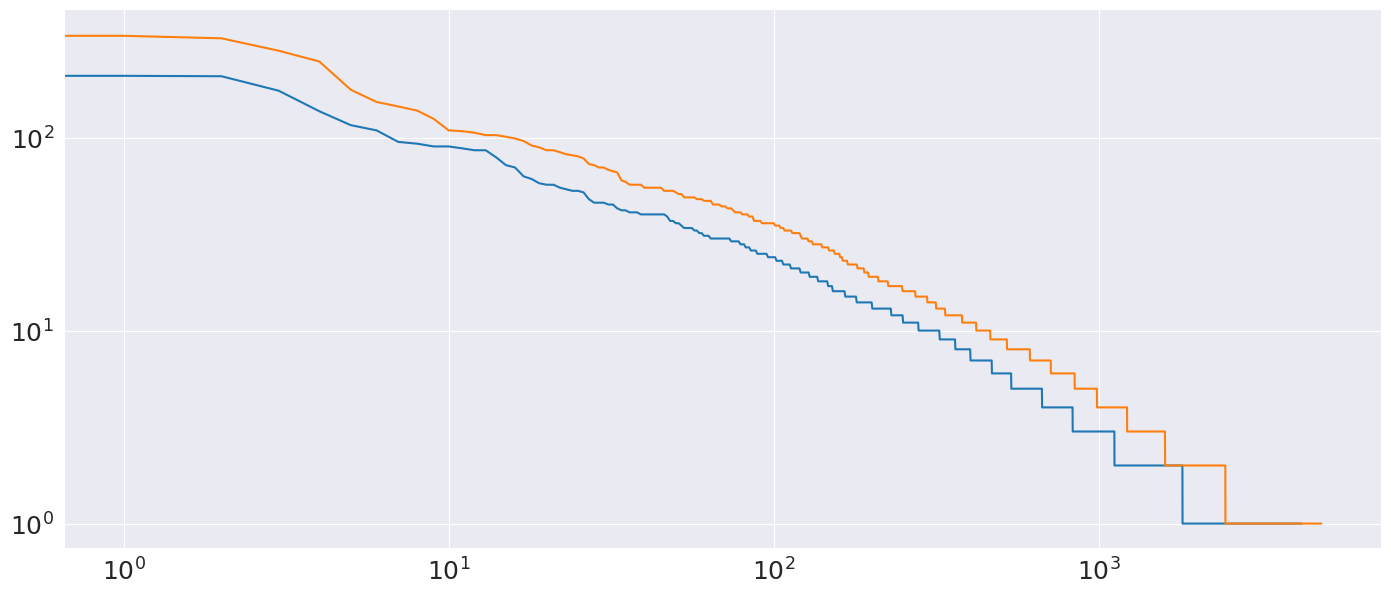

In [ ]:
# Checking if dist(<2000) == dist(>=2000)
word_freq_pre = get_word_freq(df[df['Timeline']==0]['Lyrics'])
word_freq_post = get_word_freq(df[df['Timeline']==1]['Lyrics'])

x_pre, x_post = range(len(word_freq_pre)-1), range(len(word_freq_post)-1)
y_pre, y_post = [tup[1] for tup in word_freq_pre[1:]], [tup[1] for tup in word_freq_post[1:]]


plt.xscale('log')
plt.yscale('log')

plt.plot(x_pre, y_pre)
plt.plot(x_post, y_post)

In [ ]:
len(y_pre), len(y_post)

(4206, 4834)

In [ ]:
print(kstest(y_pre, y_post))
print(mannwhitneyu(y_pre, y_post))

KstestResult(statistic=0.07696454284135337, pvalue=4.89077966379063e-12, statistic_location=1, statistic_sign=1)
MannwhitneyuResult(statistic=9276711.0, pvalue=5.7757341685364734e-15)


In [ ]:
import re

def get_genre_freq(lyrics_list):
  bangla_punctuations = ['।', '‘', '’', '“', '”', '!', '?', ',', '.', ':', ';', '(', ')', '{', '}', '[', ']', '/', '…', '\u200c', '-']
  word_freq = {}

  for lyrics in lyrics_list:
    lyrics = re.sub('(২)', '', lyrics)
    lyrics = re.sub('(x2)', '', lyrics)

    for p in bangla_punctuations:
      lyrics = lyrics.replace(p, '')

    lyrics = lyrics.replace('\n', ' ')

    for word in lyrics.split(' '):
      if word not in word_freq.keys():
        word_freq[word] = 1
      else:
        word_freq[word] += 1

  return sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

In [ ]:
length = len(df['Lyrics'][0])
print(f'Length of a sample Lyrics: {length}')

Length of a sample Lyrics: 500


In [ ]:
df['Length'] = df['Lyrics'].str.len()

Word Count

In [ ]:
word_count = df['Lyrics'][0].split()
print(f'Word count in a sample lyrics: {len(word_count)}')

Word count in a sample lyrics: 83


In [ ]:
def word_count(song_lyrics):
    lyrics_list = song_lyrics.split()
    return len(lyrics_list)

df['Word_count'] = df['Lyrics'].apply(word_count)
# df.head(10)

Mean word length: Average length of words

In [ ]:
df['mean_word_length'] = df['Lyrics'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
df.head(10)

Artists Album name  \
0            Azam Khan    Ovimani   
1            Azam Khan        NaN   
2  Rabindranath Tagore        NaN   
3  Rabindranath Tagore        NaN   
4  Rabindranath Tagore        NaN   
5  Rabindranath Tagore        NaN   
6  Rabindranath Tagore        NaN   
7  Rabindranath Tagore        NaN   
8  Rabindranath Tagore        NaN   
9  Rabindranath Tagore        NaN   

                                               Title  \
0                              Bangladesh (বাংলাদেশ)   
1             Papri Keno Bojhena (পাপড়ি কেন বোঝে না)   
2     Abelay Jodi Esechho | অবেলায় যদি এসেছ আমার বনে   
3                    Abhishap Noy Noy | অভিশাপ নয় নয়   
4            Abhoy Dao To Boli | অভয় দাও তো বলি আমার   
5                      Ache Mor Pran (আছে মোর প্রাণ)   
6     Achenake Bhoy Ki Amar | অচেনাকে ভয় কী আমার ওরে   
7    Achhe Dukkho Achhe Mrityu (আছে দুঃখ আছে মৃত্যু)   
8  Achhe Tomar Bidye Saddhi Jana (আছে তোমার বিদ্য...   
9          Achho Akash Pane Tule (আছ আকাশ পানে তুলে)   

                                              Lyrics  Timeline  Pop  Rock  \
0  রেললাইনের ঐ বস্তিতে\nজন্মেছিল একটি ছেলে\nমা তা...         0    1     1   
1  সারা রাত জেগে জেগে,\nকত কথাই আমি ভাবি।\nপাপড়ি ...         0    1     1   
2  অবেলায় যদি এসেছ আমার বনে দিনের বিদায়ক্ষণে\nগেয়...         0    0     0   
3  প্রকৃতি । অভিশাপ নয় নয়,\nঅভিশাপ নয় নয়-\nআনছে আ...         0    0     0   
4  অভয় দাও তো বলি আমার\nwish কী-\nএকটি ছটাক সোডার...         0    0     0   
5  বজ্রসেন । আছে মোর প্রাণ, আছে মোর শ্বাস ।।\nকোট...         0    0     0   
6  অচেনাকে ভয় কী আমার ওরে?\nঅচেনাকেই চিনে চিনে উঠ...         0    0     0   
7  আছে দুঃখ, আছে মৃত্যু, বিরহদহন লাগে।\nতবুও শান্...         0    0     0   
8  দ্বিতীয় দস্যু । আছে তোমার বিদ্যে-সাধ্যি জানা ।...         0    0     0   
9  আছ আকাশ-পানে তুলে মাথা,\nকোলে আধেকখানি মালা গা...         0    0     0   

   Folk/Urban Folk  Patriotic  RabindraSangeet  NazrulSangeet  Spiritual  \
0                0          1                0              0          0   
1                0          0                0              0          0   
2                0          0                1              0          0   
3                0          0                1              0          0   
4                0          0                1              0          0   
5                0          0                1              0          0   
6                0          0                1              0          0   
7                0          0                1              0          0   
8                0          0                1              0          0   
9                0          0                1              0          0   

   Mixed  Length  Word_count  mean_word_length  
0      0     500          83          5.000000  
1      0     362          77          3.688312  
2      0     455          93          3.903226  
3      0     249          45          4.555556  
4      0      73          16          3.625000  
5      0     257          54          3.777778  
6      0     292          59          3.966102  
7      0     283          48          4.916667  
8      0     314          65          3.846154  
9      0     251          44          4.727273

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['mean_sent_length'] = df['Lyrics'].map(lambda lyr: np.mean([len(sent) for sent in tokenize.sent_tokenize(lyr)]))

# df.head(10)

In [ ]:
# pd.set_option('display.max_columns', 30)
# pd.options.display.max_columns = 30

# pd.set_option('display.max_columns', None)
# df.head()

In [ ]:
df[df['Artists'] == '0'].index

Int64Index([], dtype='int64')

In [ ]:
df.iloc[220]

Artists                                                Bappa Mazumder
Album name                                               Din Bari Jay
Title                                         Bhebe Bhebe (ভেবে ভেবে)
Lyrics              ভেবে ভেবে বল আর কি হবে\nযা হবার তার সব কি হবে\...
Timeline                                                            1
Pop                                                                 1
Rock                                                                0
Folk/Urban Folk                                                     0
Patriotic                                                           0
RabindraSangeet                                                     0
NazrulSangeet                                                       0
Spiritual                                                           0
Mixed                                                               1
Length                                                            632
Word_count          

In [ ]:
def visualize(col):

    print()
    plt.subplot(1,2,1)
    sns.boxplot(y=df[col])
    plt.ylabel(col, labelpad=12.5)

    plt.subplot(1,2,2)
    sns.kdeplot(df[col])
    # plt.legend(df['Artists'].unique())
    plt.xlabel('')
    plt.ylabel('')

    plt.show()

In [ ]:
# features = df.columns.tolist()[13:]
# for feature in features:
#     visualize(feature)

In [ ]:
g = df.groupby('Artists')['Word_count'].mean().reset_index()

In [ ]:
# Sort the dataframe by word count in descending order
g = g.sort_values(by='Word_count', ascending=False)

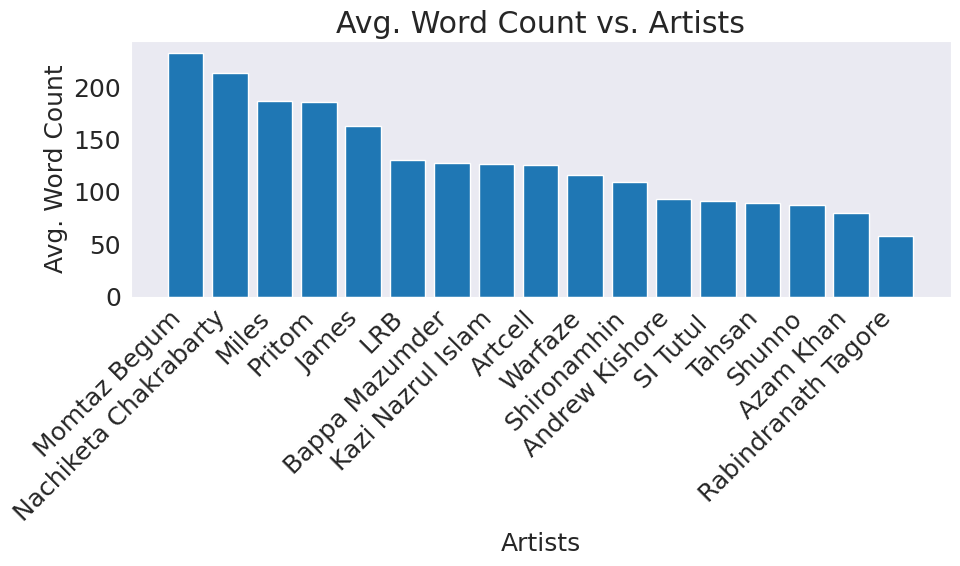

In [ ]:
# Plot the mean word count vs. artists
plt.rcParams['figure.figsize'] = (10, 6)
plt.bar(g['Artists'], g['Word_count'])
plt.xlabel('Artists')
plt.ylabel('Avg. Word Count')
plt.title('Avg. Word Count vs. Artists')
plt.xticks(rotation=45, ha= 'right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid(False)
plt.show()

Term Frequency Analysis

https://github.com/NuhashHaque/Bangla-TextClassification-Analysis-EDA-and-Models/blob/main/EDA%20on%20BanglatText.ipynb

In [ ]:
def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

In [ ]:
def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct

def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [ ]:
def corpus(text):
    text_list = text.split()
    return text_list

df['Lyrics_lists'] = df['Lyrics'].apply(corpus)
df.head(10)

Artists        Album name  \
34       Kazi Nazrul Islam               NaN   
297  Nachiketa Chakrabarty               NaN   
153           Momtaz Begum  Ami To More Jabo   
38       Kazi Nazrul Islam               NaN   
99                     LRB  Rim Jhim Brishti   
51       Kazi Nazrul Islam               NaN   
195                Artcell    Aniket Prantor   
127                  Miles           Proyash   
292  Nachiketa Chakrabarty               NaN   
286  Nachiketa Chakrabarty               NaN   

                                               Title  \
34   Ami Juge Juge Ashiyachi (আমি যুগে যুগে আসিয়াছি)   
297                  Mon Diye Lekhapora Kore Jei Jon   
153                                 Ami To More Jabo   
38                            Eider Chad (ঈদের চাঁদ)   
99                                      School Jibon   
51                         Krishoker Eid (কৃষকের ঈদ)   
195                 Aniket Prantor (অনিকেত প্রান্তর)   
127                                      Tomar Ashay   
292                                  Jibito Bibahito   
286                                Ekdin Swapner Din   

                                                Lyrics  Timeline  Pop  Rock  \
34   আমি যুগে যুগে আসি, আসিয়াছি পুন মহাবিপ্লব হেতু\...         0    0     0   
297  মন দিয়ে লেখাপড়া করে যেই জন\nবড় হয়ে গাড়িঘোড়া চড়...         0    1     0   
153  আমি তো মরে যাব\nআমি তো মরে যাব, চলে যাব, রেখে ...         1    0     0   
38   সিঁড়ি-ওয়ালাদের দুয়ারে এসেছে আজ\nচাষা মজুর ও বি...         0    0     0   
99   প্রাইমারী শেষে আমরা সবে…উঠেছি হাই স্কুলে,\nপৃথ...         1    0     1   
51   বেলাল! বেলাল! হেলাল উঠেছে পশ্চিমে আশমানে,\nলুক...         0    0     0   
195  তবু এই দেয়ালের শরীরে\nযত ছেড়া রং, ধুয়ে যাওয...         1    0     1   
127  মনের জানালা খুলে রেখেছি\nশুধু তোমার আশায় আশায...         0    0     1   
292  জনতা জনার্দন, শুনে হবেন বড় প্রীত\nপুরুষ মানুষ ...         1    1     0   
286  একদিন স্বপ্নের দিন\nএকদিন স্বপ্নের দিন বেদনার ...         0    1     0   

     Folk/Urban Folk  Patriotic  RabindraSangeet  NazrulSangeet  Spiritual  \
34                 0          0                0              1          1   
297                1          0                0              0          0   
153                1          0                0              0          1   
38                 0          0                0              1          1   
99                 0          0                0              0          0   
51                 0          0                0              1          0   
195                0          0                0              0          0   
127                0          0                0              0          0   
292                0          0                0              0          0   
286                0          0                0              0          0   

     Mixed  Length  Word_count  mean_word_length  mean_sent_length  \
34       0    3910         656          4.943598         91.857143   
297      1    2413         463          4.172786        184.384615   
153      1    2124         426          3.934272        235.111111   
38       0    2559         426          5.009390        120.904762   
99       1    2114         368          4.744565       1056.000000   
51       0    2008         353          4.682720         58.029412   
195      0    1987         336          4.875000       1987.000000   
127      1    1793         325          4.489231       1793.000000   
292      1    1872         313          4.984026        935.500000   
286      1    1697         306          4.450980       1696.000000   

                                          Lyrics_lists  
34   [আমি, যুগে, যুগে, আসি,, আসিয়াছি, পুন, মহাবিপ্ল...  
297  [মন, দিয়ে, লেখাপড়া, করে, যেই, জন, বড়, হয়ে, গাড়...  
153  [আমি, তো, মরে, যাব, আমি, তো, মরে, যাব,, চলে, য...  
38   [সিঁড়ি-ওয়ালাদের, দুয়ারে, এসেছে, আজ, চাষা, মজুর...  
99   [প্রাইমারী, শেষে, আমরা, সবে…উঠেছি, হাই, স্কুলে...  
51   [বেলাল!, বেলাল!, হেলাল, উঠ

In [ ]:
corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df['Lyrics_lists'][i]
len(corpus)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 298/298 [00:00<00:00, 49002.34it/s]


39179

In [ ]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('আমি', 534),
 ('তুমি', 518),
 ('আমার', 493),
 ('না', 448),
 ('তোমার', 396),
 ('এই', 286),
 ('কি', 268),
 ('আর', 231),
 ('যে', 190),
 ('মন', 182)]

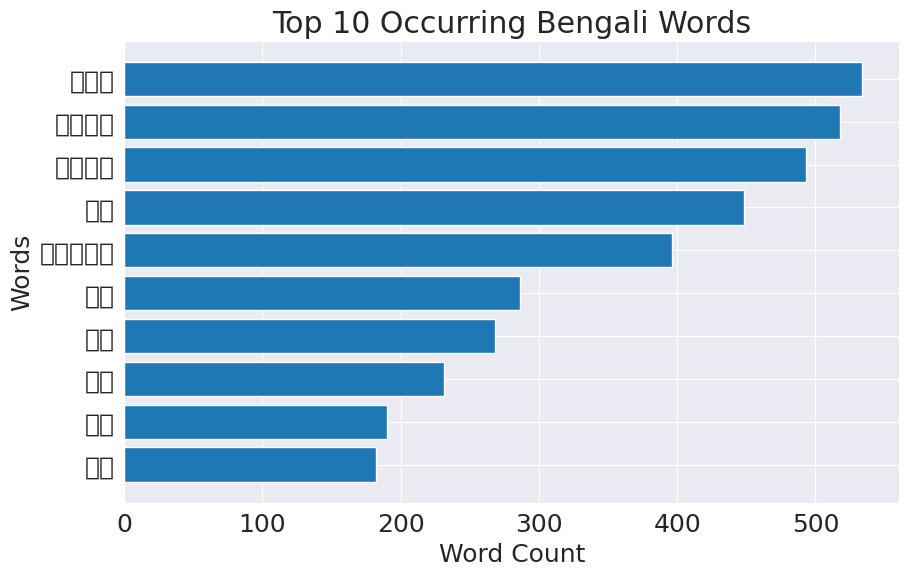

In [ ]:
# Extract words and their counts
words, counts = zip(*mostCommon)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(words, counts)
plt.xlabel('Word Count')
plt.ylabel('Words')
plt.title('Top 10 Occurring Bengali Words')
plt.gca().invert_yaxis()  # To display the most frequent words at the top
plt.show()

In [ ]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

In [ ]:
print(words)

['আমি', 'তুমি', 'আমার', 'না', 'তোমার', 'এই', 'কি', 'আর', 'যে', 'মন']


In [ ]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals

In [ ]:
!pip install -q python-bidi

In [ ]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='/content/Siyamrupali.ttf')
from bidi.algorithm import get_display

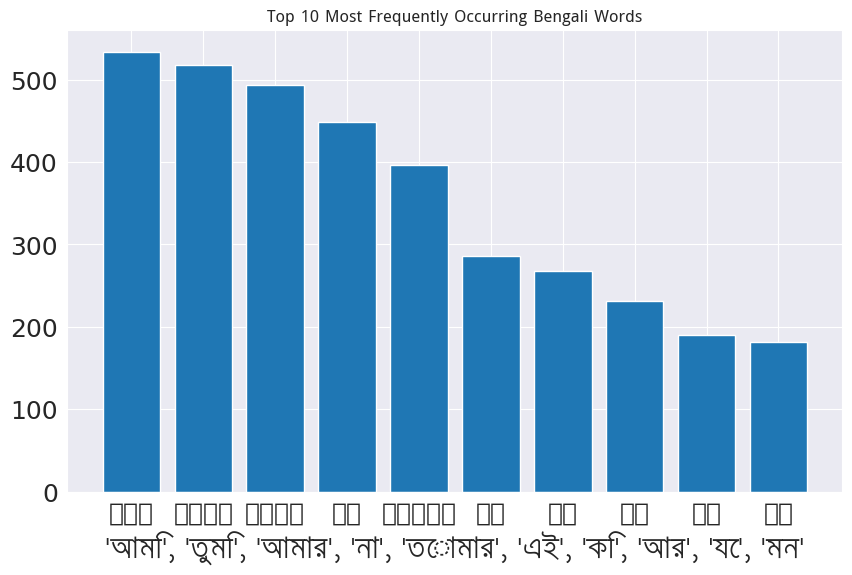

In [ ]:
plt.bar(words, freq,)
plt.title('Top 10 Most Frequently Occurring Bengali Words', fontproperties=prop, fontsize=12)
# Set the x-axis label
plt.xlabel("'আমি', 'তুমি', 'আমার', 'না', 'তোমার', 'এই', 'কি', 'আর', 'যে', 'মন'",fontproperties=prop)
plt.show()

### Most Frequently occuring N_grams

What is an N-gram?
An n-gram is sequence of n words in a text. Most words by themselves may not present the entire context. Typically adverbs such as 'most' or 'very' are used to modify verbs and adjectives. Therefore, n-grams help analyse phrases and not just words which can lead to better insights.

For separating text into n-grams, we will use CountVectorizer from Sklearn


In [ ]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['Lyrics'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

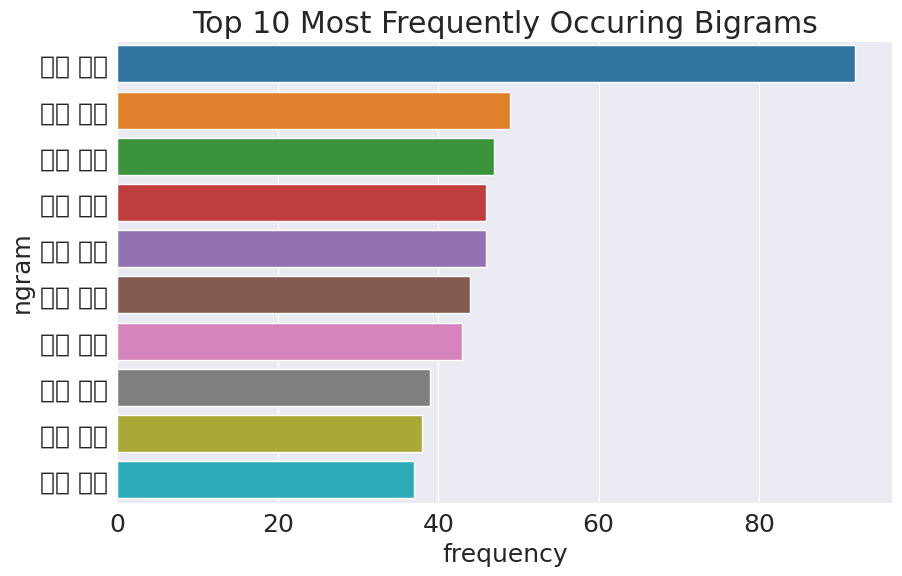

In [ ]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [ ]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['Lyrics'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

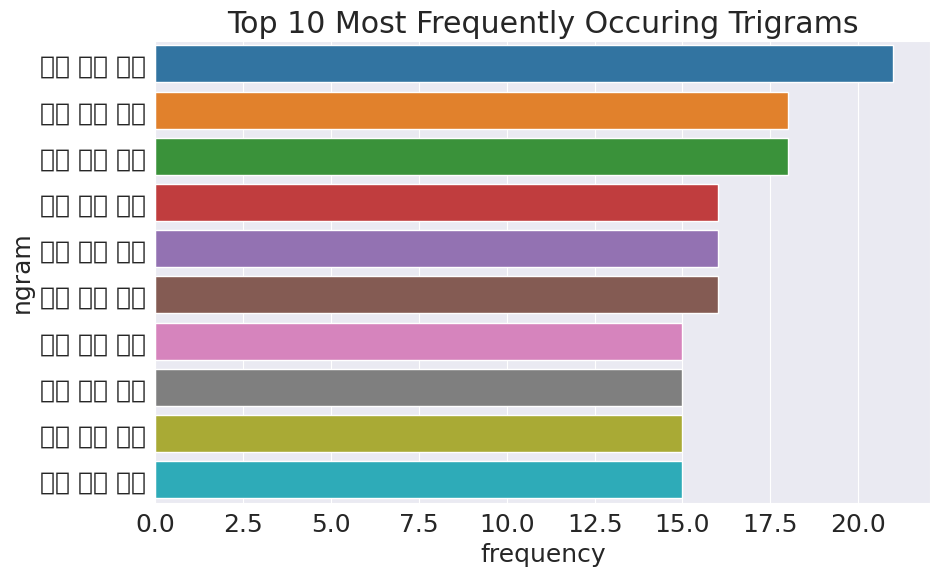

In [ ]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

Length of the lyrics VS Genre of Music

In [ ]:
df.columns.to_list()

['Artists',
 'Album name',
 'Title',
 'Lyrics',
 'Timeline',
 'Pop',
 'Rock',
 'Folk/Urban Folk',
 'Patriotic',
 'RabindraSangeet',
 'NazrulSangeet',
 'Spiritual',
 'Mixed',
 'Length',
 'Word_count',
 'mean_word_length',
 'mean_sent_length',
 'Lyrics_lists']

In [ ]:
df['Length']

34     3910
298    2413
154    2124
38     2559
100    2114
       ... 
13      222
65      218
10      204
50      141
4        73
Name: Length, Length: 299, dtype: int64

In [ ]:
genre_cnt = {
    'Pop' : df['Pop'].value_counts()[1],
    'Rock' : df['Rock'].value_counts()[1],
    'Folk/Urban Folk' : df['Folk/Urban Folk'].value_counts()[1],
    'Patriotic' : df['Patriotic'].value_counts()[1],
    'RabindraSangeet' : df['RabindraSangeet'].value_counts()[1],
    'NazrulSangeet' : df['NazrulSangeet'].value_counts()[1],
    'Spiritual' : df['Spiritual'].value_counts()[1]
}

print(genre_cnt)

{'Pop': 108, 'Rock': 155, 'Folk/Urban Folk': 17, 'Patriotic': 8, 'RabindraSangeet': 26, 'NazrulSangeet': 29, 'Spiritual': 20}


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Pop'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Folk/Urban Folk'),
  Text(3, 0, 'Patriotic'),
  Text(4, 0, 'RabindraSangeet'),
  Text(5, 0, 'NazrulSangeet'),
  Text(6, 0, 'Spiritual')])

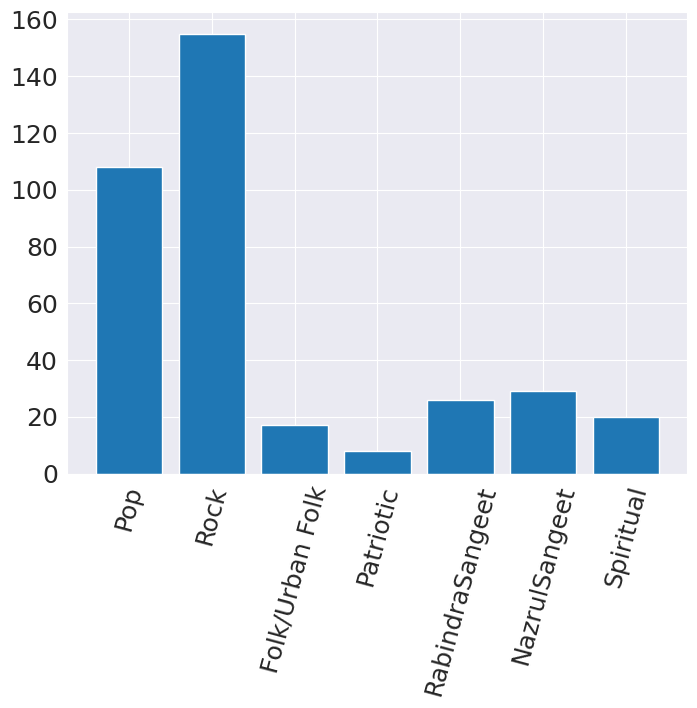

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.bar(genre_cnt.keys(), genre_cnt.values())
plt.xticks(rotation = 75)

In [ ]:
genre_word_cnt = {
    'Pop' : df[df['Pop'] == 1]['Word_count'].mean(),
    'Rock' : df[df['Rock'] == 1]['Word_count'].mean(),
    'Folk/Urban Folk' : df[df['Folk/Urban Folk'] == 1]['Word_count'].mean(),
    'Patriotic' : df[df['Patriotic'] == 1]['Word_count'].mean(),
    'RabindraSangeet' : df[df['RabindraSangeet'] == 1]['Word_count'].mean(),
    'NazrulSangeet' : df[df['NazrulSangeet'] == 1]['Word_count'].mean(),
    'Spiritual' : df[df['Spiritual'] == 1]['Word_count'].mean()
}

print(genre_word_cnt)

{'Pop': 150.58333333333334, 'Rock': 129.1290322580645, 'Folk/Urban Folk': 216.35294117647058, 'Patriotic': 119.0, 'RabindraSangeet': 58.07692307692308, 'NazrulSangeet': 127.10344827586206, 'Spiritual': 149.7}


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Pop'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Folk/Urban Folk'),
  Text(3, 0, 'Patriotic'),
  Text(4, 0, 'RabindraSangeet'),
  Text(5, 0, 'NazrulSangeet'),
  Text(6, 0, 'Spiritual')])

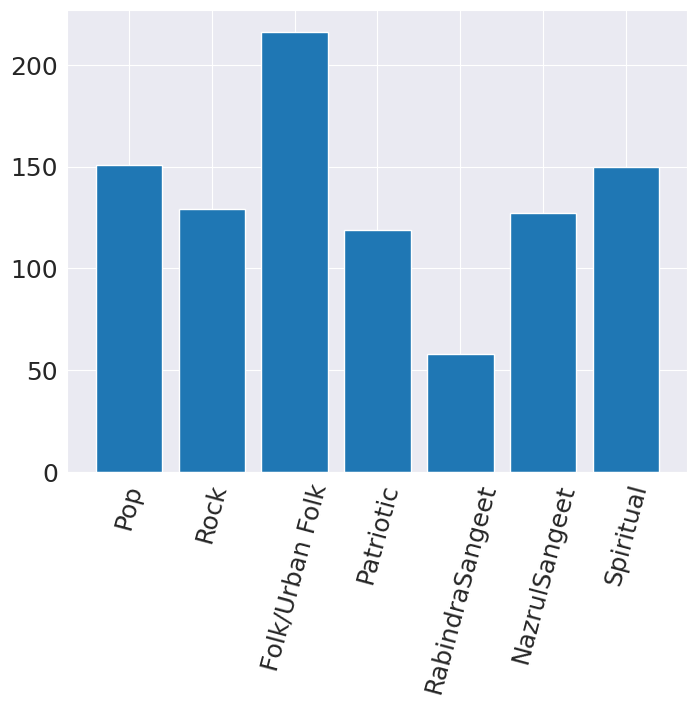

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.bar(genre_word_cnt.keys(), genre_word_cnt.values())
plt.xticks(rotation = 75)

In [ ]:
!pip install python-bidi

In [ ]:
from bidi.algorithm import get_display

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
df['Lyrics']

0      রেললাইনের ঐ বস্তিতে\nজন্মেছিল একটি ছেলে\nমা তা...
1      সারা রাত জেগে জেগে,\nকত কথাই আমি ভাবি।\nপাপড়ি ...
2      অবেলায় যদি এসেছ আমার বনে দিনের বিদায়ক্ষণে\nগেয়...
3      প্রকৃতি । অভিশাপ নয় নয়,\nঅভিশাপ নয় নয়-\nআনছে আ...
4      অভয় দাও তো বলি আমার\nwish কী-\nএকটি ছটাক সোডার...
                             ...                        
293    কেউ হতে চায় ডাক্তার,\nকেউ বা ইঞ্জিনিয়ার,\nকেউ ...
294    হেই, তুমি কি আমায় ভালোবাসো?\nহেই, তুমি কি আমা...
295    কেউ বলে বুড়ো ভাম, কেউ বলে পাজি\nকেউ বলে এইবার ...
296     ভিড় করে ইমারত আকাশটা ঢেকে দিয়ে,\nচুরি করে ন...
297    মন দিয়ে লেখাপড়া করে যেই জন\nবড় হয়ে গাড়িঘোড়া চড়...
Name: Lyrics, Length: 298, dtype: object

In [ ]:
for cat in df['Lyrics']:
  print(cat.split())

['রেললাইনের', 'ঐ', 'বস্তিতে', 'জন্মেছিল', 'একটি', 'ছেলে', 'মা', 'তাঁর', 'কাঁদে', 'ছেলেটি', 'মরে', 'গেছে', 'রেললাইনের', 'ঐ', 'বস্তিতে', 'জন্মেছিল', 'একটি', 'ছেলে', 'মা', 'তাঁর', 'কাঁদে', 'ছেলেটি', 'মরে', 'গেছে', 'হায়রে', 'হায়', 'বাংলাদেশ', 'বাংলাদেশ', 'বাংলাদেশ', 'বাংলাদেশ', 'বাংলাদেশ', 'বাংলাদেশ', 'বাংলাদেশ', 'বাংলাদেশ(২)', 'কত', 'আশা', 'ছিল', 'তাঁর', 'জীবনে', 'সব', 'স্মৃতি', 'রেখে', 'গেল', 'মরণে(২)', 'মা', 'তাঁর', 'পাশে', 'চেয়ে', 'বসে', 'আছে', 'হায়রে', 'হায়', 'বাংলাদেশ', 'বাংলাদেশ', 'বাংলাদেশ', 'বাংলাদেশ', 'কত', 'মার', 'অশ্রু', 'আজ', 'নয়নে', 'কে', 'তা', 'মুছাবে', 'বা', 'কেমনে(২)', 'যে', 'চলে', 'যায়', 'সে', 'কি', 'ফিরে', 'আসে', 'হায়রে', 'হায়', 'বাংলাদেশ', 'বাংলাদেশ', 'বাংলাদেশ', 'বাংলাদেশ', 'বাংলাদেশ', 'বাংলাদেশ', 'বাংলাদেশ', 'বাংলাদেশ']
['সারা', 'রাত', 'জেগে', 'জেগে,', 'কত', 'কথাই', 'আমি', 'ভাবি।', 'পাপড়ি', 'কেন', 'বোঝে', 'না?', 'তাই', 'ঘুম', 'আসে', 'না।', 'পাপড়ি', 'কেন', 'বোঝে', 'না?', 'তাই', 'ঘুম', 'আসে', 'না।', 'তুমি', 'আমি', 'কেন', 'দূরে', 'দূরে?', 'খুঁজে', 'বেড়াই', 'ঘুরে', 'ঘুরে।

In [ ]:
text = " ".join([" ".join(cat.split()) for cat in df['Lyrics']])

In [ ]:
print(text)

আমি যুগে যুগে আসি, আসিয়াছি পুন মহাবিপ্লব হেতু এই স্রষ্টার শনি মহাকাল ধূমকেতু! সাত—সাতশো নরক-জ্বালা জলে মম ললাটে, মম ধূম-কুণ্ডলী করেছে শিবের ত্রিনয়ন ঘন ঘোলাটে। আমি অশিব তিক্ত অভিশাপ, আমি স্রষ্টার বুকে সৃষ্টি-পাপের অনুতাপ-তাপ-হাহাকার— আর মর্তে সাহারা-গোবি-ছাপ, আমি অশিব তিক্ত অভিশাপ! আমি সর্বনাশের ঝাণ্ডা উড়ায়ে বোঁও বোঁও ঘুরি শূন্যে, আমি বিষ-ধূম-বাণ হানি একা ঘিরে ভগবান-অভিমুন্যে। শোঁও শন-নন-নন-শন-নন-নন শাঁই শাঁই, ঘুর্ পাক্ খাই, ধাই পাঁই পাঁই মম পুচ্ছে জড়ায়ে সৃষ্টি; করি উল্কা-অশনি-বৃষ্টি,— আমি একটা বিশ্ব গ্রাসিয়াছি, পারি গ্রাসিতে এখনো ত্রিশটি। আমি অপঘাত দুর্দৈব রে আমি সৃষ্টির অনাসৃষ্টি! আমি আপনার বিষ-জ্বালা-মদ-পিয়া মোচড় খাইয়া খাইয়া জোর বুঁদ হয়ে আমি চলেছি ধাইয়া ভাইয়া! শুনি মম বিষাক্ত ‘রিরিরিরি’-নাদ শোনায় দ্বিরেফ-গুঞ্জন সম বিশ্ব-ঘোরার প্রণব-নিনাদ! ধূর্জটি-শিখ করাল পুচ্ছে দশ অবতারে বেঁধে ঝ্যাঁটা করে ঘুরাই উচ্চে, ঘুরাই— আমি অগ্নি-কেতন উড়াই!— আমি যুগে যুগে আসি, আসিয়াছি পুন মহাবিপ্লব হেতু এই স্রষ্টার শনি মহাকাল ধূমকেতু! ঐ বামন বিধি সে আমারে ধরিতে বাড়ায়েছিল রে হাত মম অগ্নি-দাহনে জ্বলে পুড়ে তাই ঠুঁ

In [ ]:
bidi_text = get_display(text)

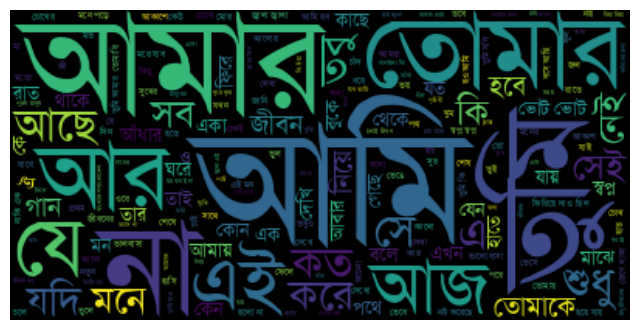

In [ ]:
from wordcloud import WordCloud
rgx = r"[\u0980-\u09FF]+"
wordcloud = WordCloud(font_path='/content/SolaimanLipi-8-Jan-2011.ttf',  regexp=rgx).generate(bidi_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Correlation Heat Map

In [ ]:
df.corr()

Timeline       Pop      Rock  Folk/Urban Folk  Patriotic  \
Timeline          1.000000  0.268233  0.275538         0.030786  -0.070770   
Pop               0.268233  1.000000 -0.374556         0.055350  -0.082032   
Rock              0.275538 -0.374556  1.000000        -0.225827  -0.006104   
Folk/Urban Folk   0.030786  0.055350 -0.225827         1.000000  -0.040710   
Patriotic        -0.070770 -0.082032 -0.006104        -0.040710   1.000000   
RabindraSangeet  -0.366618 -0.233097 -0.320177        -0.075771  -0.051169   
NazrulSangeet    -0.389337 -0.247547 -0.340018        -0.080467   0.225790   
Spiritual        -0.193684 -0.153038 -0.258956         0.102073  -0.045571   
Mixed            -0.085333  0.281901  0.219041         0.139112  -0.118334   
Length            0.038316  0.153939 -0.016581         0.238686  -0.011255   
Word_count        0.034636  0.185517 -0.033001         0.264701  -0.026644   
mean_word_length  0.088953 -0.209857  0.146829        -0.054026   0.071557   
mean_sent_length  0.078216  0.076284  0.210726         0.171100  -0.008656   

                  RabindraSangeet  NazrulSangeet  Spiritual     Mixed  \
Timeline                -0.366618      -0.389337  -0.193684 -0.085333   
Pop                     -0.233097      -0.247547  -0.153038  0.281901   
Rock                    -0.320177      -0.340018  -0.258956  0.219041   
Folk/Urban Folk         -0.075771      -0.080467   0.102073  0.139112   
Patriotic               -0.051169       0.225790  -0.045571 -0.118334   
RabindraSangeet          1.000000      -0.101140  -0.038370 -0.297455   
NazrulSangeet           -0.101140       1.000000   0.573285 -0.315888   
Spiritual               -0.038370       0.573285   1.000000 -0.186332   
Mixed                   -0.297455      -0.315888  -0.186332  1.000000   
Length                  -0.291352       0.002609   0.079192  0.286440   
Word_count              -0.288833      -0.018872   0.064583  0.317308   
mean_word_length        -0.072359       0.077078   0.089472 -0.180648   
mean_sent_length        -0.257953      -0.218054  -0.120448  0.312532   

                    Length  Word_count  mean_word_length  mean_sent_length  
Timeline          0.038316    0.034636          0.088953          0.078216  
Pop               0.153939    0.185517         -0.209857          0.076284  
Rock             -0.016581   -0.033001          0.146829          0.210726  
Folk/Urban Folk   0.238686    0.264701         -0.054026          0.171100  
Patriotic        -0.011255   -0.026644          0.071557         -0.008656  
RabindraSangeet  -0.291352   -0.288833         -0.072359         -0.257953  
NazrulSangeet     0.002609   -0.018872          0.077078         -0.218054  
Spiritual         0.079192    0.064583          0.089472         -0.120448  
Mixed             0.286440    0.317308         -0.180648          0.312532  
Length            1.000000    0.989294          0.043797          0.422929  
Word_count        0.989294    1.000000         -0.080714          0.424107  
mean_word_length  0.043797   -0.080714          1.000000          0.033835  
mean_sent_length  0.422929    0.424107          0.033835          1.000000

In [ ]:
# sns.heatmap(df.corr());

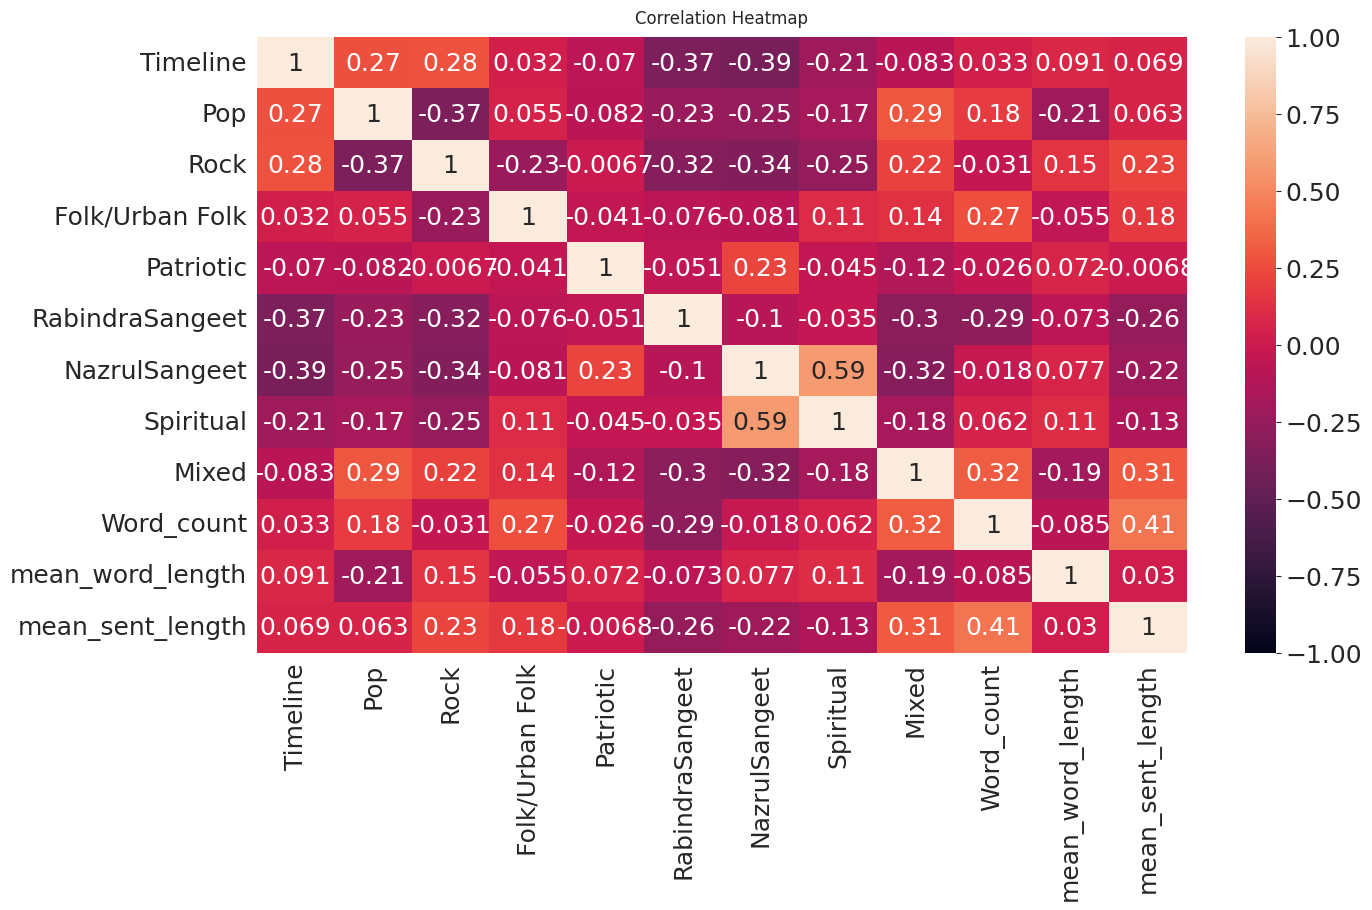

In [ ]:
plt.figure(figsize=(15, 8))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=10);

### Clustering

Use Silhoutte score for optimal cluster number

GMM.  
K - Means.  
Agglomerative  
DBSCAN  

KMeans

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans, KMeans

In [ ]:
vec = TfidfVectorizer()
vec.fit(df.Lyrics.values)
features = vec.transform(df.Lyrics.values)

In [ ]:
df.iloc[:,4:17]

Timeline  Pop  Rock  Folk/Urban Folk  Patriotic  RabindraSangeet  \
0           0    1     1                0          1                0   
1           0    1     1                0          0                0   
2           0    0     0                0          0                1   
3           0    0     0                0          0                1   
4           0    0     0                0          0                1   
..        ...  ...   ...              ...        ...              ...   
293         0    1     0                0          0                0   
294         0    1     0                0          0                0   
295         0    1     0                1          0                0   
296         0    1     0                1          0                0   
297         0    1     0                1          0                0   

     NazrulSangeet  Spiritual  Mixed  Length  Word_count  mean_word_length  \
0                0          0      0     500          83          5.000000   
1                0          0      0     362          77          3.688312   
2                0          0      0     455          93          3.903226   
3                0          0      0     249          45          4.555556   
4                0          0      0      73          16          3.625000   
..             ...        ...    ...     ...         ...               ...   
293              0          0      1    1328         231          4.718615   
294              0          0      1    1384         256          4.410156   
295              0          0      1     882         168          4.255952   
296              0          0      1    1388         233          4.939914   
297              0          0      1    2413         463          4.172786   

     mean_sent_length  
0          500.000000  
1           50.857143  
2          455.000000  
3          249.000000  
4           73.000000  
..                ...  
293       1328.000000  
294        137.600000  
295        882.000000  
296       1388.000000  
297        184.384615  

[298 rows x 13 columns]

In [ ]:
df.isna().sum()

Artists               0
Album name          112
Title                 0
Lyrics                0
Timeline              0
Pop                   0
Rock                  0
Folk/Urban Folk       0
Patriotic             0
RabindraSangeet       0
NazrulSangeet         0
Spiritual             0
Mixed                 0
Length                0
Word_count            0
mean_word_length      0
mean_sent_length      0
Lyrics_lists          0
k_cluster_lbls        0
dtype: int64

In [ ]:
clust = KMeans(init='k-means++', n_clusters = 2, n_init =10)
clust.fit(df.iloc[:,4:17])

KMeans(n_clusters=2, n_init=10)

In [ ]:
yhat = clust.predict(df.iloc[:,4:17])

df['k_cluster_lbls'] = clust.labels_

In [ ]:
df.head()

Artists Album name  \
0            Azam Khan    Ovimani   
1            Azam Khan        NaN   
2  Rabindranath Tagore        NaN   
3  Rabindranath Tagore        NaN   
4  Rabindranath Tagore        NaN   

                                            Title  \
0                           Bangladesh (বাংলাদেশ)   
1          Papri Keno Bojhena (পাপড়ি কেন বোঝে না)   
2  Abelay Jodi Esechho | অবেলায় যদি এসেছ আমার বনে   
3                 Abhishap Noy Noy | অভিশাপ নয় নয়   
4         Abhoy Dao To Boli | অভয় দাও তো বলি আমার   

                                              Lyrics  Timeline  Pop  Rock  \
0  রেললাইনের ঐ বস্তিতে\nজন্মেছিল একটি ছেলে\nমা তা...         0    1     1   
1  সারা রাত জেগে জেগে,\nকত কথাই আমি ভাবি।\nপাপড়ি ...         0    1     1   
2  অবেলায় যদি এসেছ আমার বনে দিনের বিদায়ক্ষণে\nগেয়...         0    0     0   
3  প্রকৃতি । অভিশাপ নয় নয়,\nঅভিশাপ নয় নয়-\nআনছে আ...         0    0     0   
4  অভয় দাও তো বলি আমার\nwish কী-\nএকটি ছটাক সোডার...         0    0     0   

   Folk/Urban Folk  Patriotic  RabindraSangeet  NazrulSangeet  Spiritual  \
0                0          1                0              0          0   
1                0          0                0              0          0   
2                0          0                1              0          0   
3                0          0                1              0          0   
4                0          0                1              0          0   

   Mixed  Length  Word_count  mean_word_length  mean_sent_length  \
0      0     500          83          5.000000        500.000000   
1      0     362          77          3.688312         50.857143   
2      0     455          93          3.903226        455.000000   
3      0     249          45          4.555556        249.000000   
4      0      73          16          3.625000         73.000000   

   k_cluster_lbls  
0               0  
1               0  
2               0  
3               0  
4               0

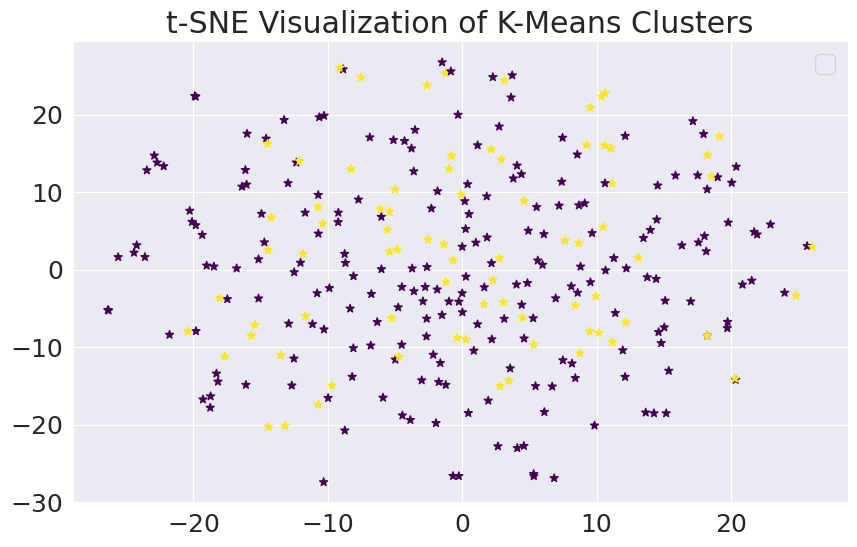

In [ ]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
tsne_results = tsne.fit_transform(features.toarray())

# Plot t-SNE results with K-Means cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['k_cluster_lbls'], cmap='viridis', marker='*')
plt.title('t-SNE Visualization of K-Means Clusters')
plt.legend()
plt.show()

<Axes: >

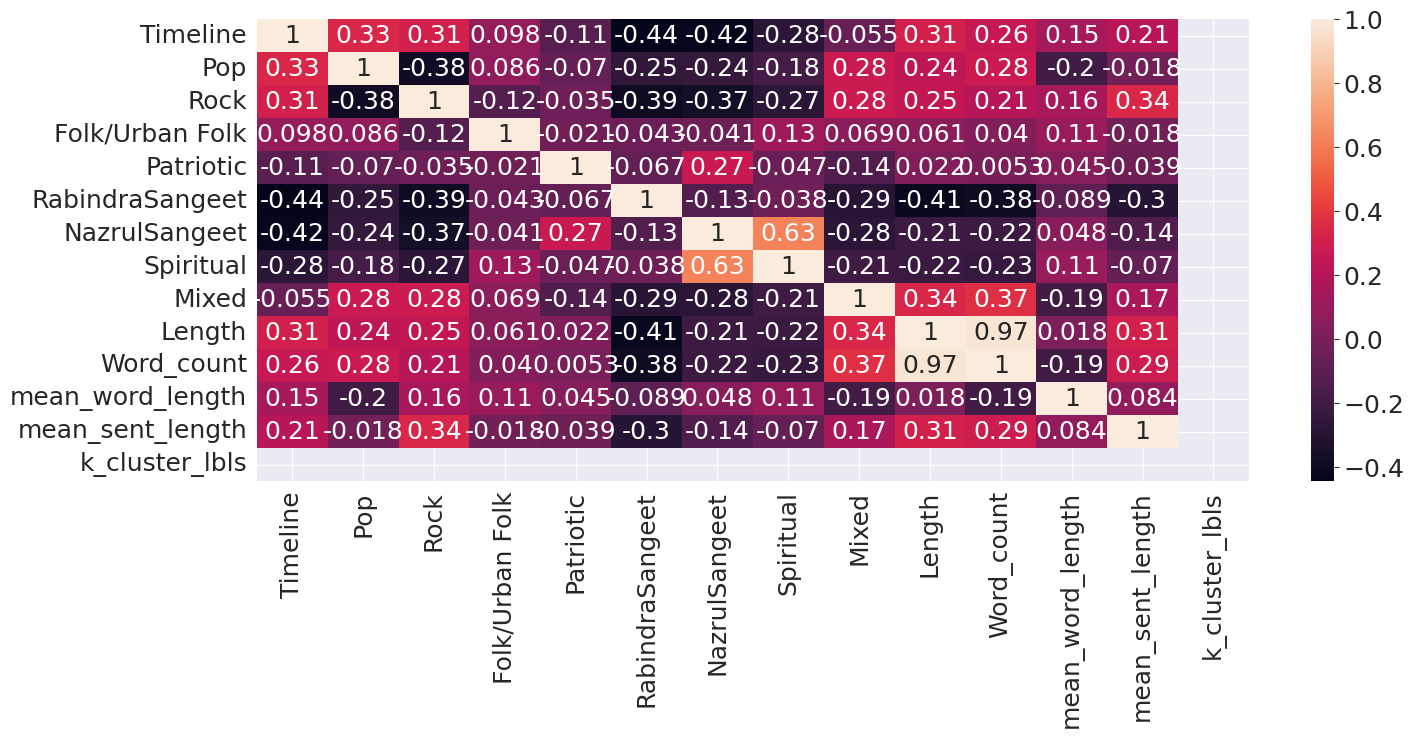

In [ ]:
plt.figure(figsize=(16, 6))

sns.heatmap((df[df['k_cluster_lbls'] == 0]).corr(), annot = True)

In [ ]:
df.iloc[:,4:13]

Timeline  Pop  Rock  Folk/Urban Folk  Patriotic  RabindraSangeet  \
34          0    0     0                0          0                0   
297         0    1     0                1          0                0   
153         1    0     0                1          0                0   
38          0    0     0                0          0                0   
99          1    0     1                0          0                0   
..        ...  ...   ...              ...        ...              ...   
13          0    0     0                0          0                1   
64          1    1     0                0          0                0   
10          0    0     0                0          0                1   
50          0    0     0                0          0                0   
4           0    0     0                0          0                1   

     NazrulSangeet  Spiritual  Mixed  
34               1          1      0  
297              0          0      1  
153              0          1      1  
38               1          1      0  
99               0          0      1  
..             ...        ...    ...  
13               0          0      0  
64               0          0      0  
10               0          0      0  
50               1          1      0  
4                0          0      0  

[298 rows x 9 columns]

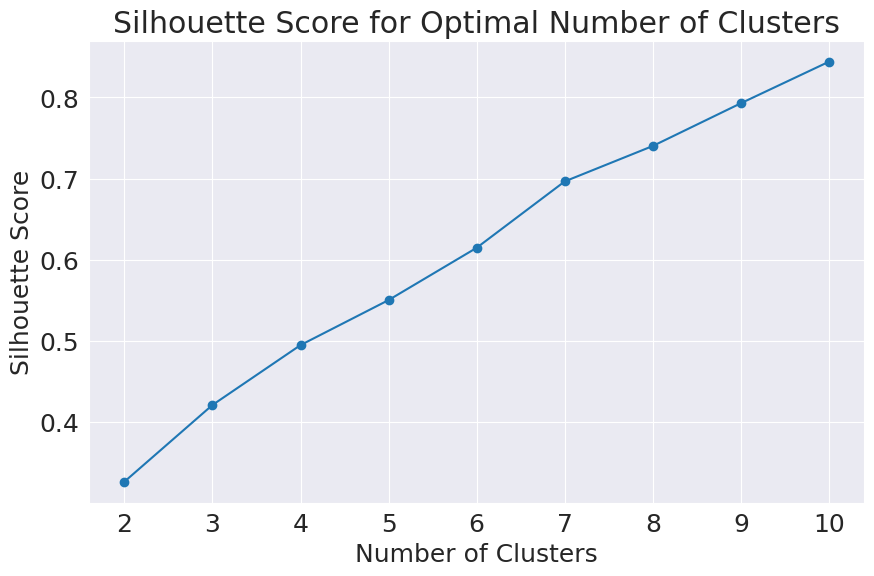

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette scores for a range of cluster numbers
silhouette_scores = []
for n_clusters in range(2, 11):  # Adjust the range as needed
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=20, random_state=42)
    cluster_labels = kmeans.fit_predict(df.iloc[:,4:13])
    silhouette_avg = silhouette_score(df.iloc[:,4:13], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

In [ ]:
clust = KMeans(init='k-means++', n_clusters = 10, n_init =10)
clust.fit(df.iloc[:,4:13])

KMeans(n_clusters=10, n_init=10)

In [ ]:
yhat = clust.predict(df.iloc[:,4:13])

df['k_cluster_lbls'] = clust.labels_

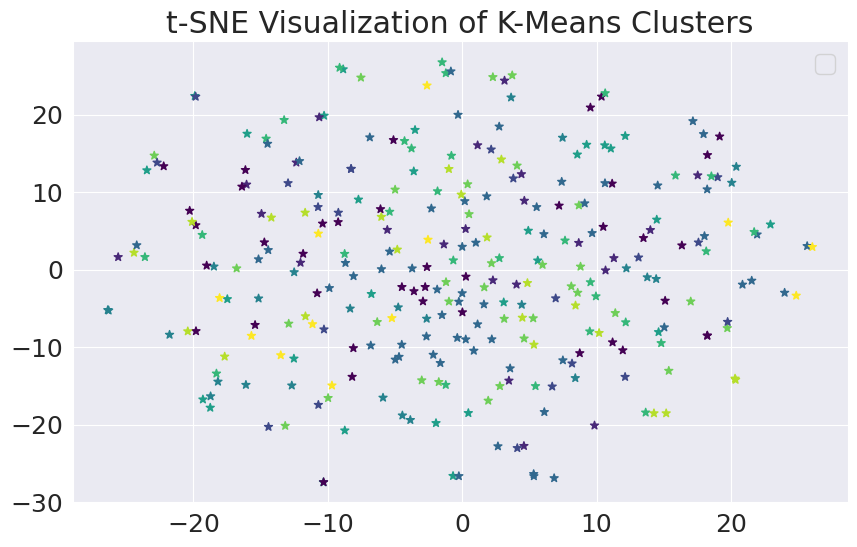

In [ ]:
# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
tsne_results = tsne.fit_transform(features.toarray())

# Plot t-SNE results with K-Means cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['k_cluster_lbls'], cmap='viridis', marker='*')
plt.title('t-SNE Visualization of K-Means Clusters')
plt.legend()
plt.show()

In [ ]:
g = df.groupby("k_cluster_lbls")


In [ ]:
# for clust, data in g:
#   print("Cluster:", clust)
#   print(data)
#   print()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(df, x = 'Artists', y='Timeline',
              color='k_cluster_lbls',opacity = 0.8, size='mean_sent_length', size_max=30)
fig.show()

Cluster 0 has mixed Rock songs with timeline 0.  
Cluster 1 has mixed patriotic songs timeline 1.  
Cluster 2 has mixed pop songs.  
Cluster 3 has pure rock songs from time 1.  
Cluster 4 has more importance with length and word count timeline 0.   
Cluster 5 has Nazrul Sangeet with taste of Patriotic and spirituality.  
Cluster 7 is filled with folk songs with timeline of 1.    


In [ ]:
g.describe()

Timeline                                                 Pop  \
                  count      mean       std  min   25%  50%  75%  max count   
k_cluster_lbls                                                                
0                  40.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0  40.0   
1                  23.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0  23.0   
2                  21.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0  21.0   
3                  62.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0  62.0   
4                  26.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0  26.0   
5                  29.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0  29.0   
6                  30.0  0.866667  0.345746  0.0  1.00  1.0  1.0  1.0  30.0   
7                  33.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0  33.0   
8                  22.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0  22.0   
9                  12.0  0.750000  0.452267  0.0  0.75  1.0  1.0  1.0  12.0   

                                                             Rock            \
                    mean       std  min  25%  50%  75%  max count mean  std   
k_cluster_lbls                                                                
0               0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  40.0  1.0  0.0   
1               0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  23.0  1.0  0.0   
2               1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  21.0  0.0  0.0   
3               0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  62.0  1.0  0.0   
4               0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  26.0  0.0  0.0   
5               0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  29.0  0.0  0.0   
6               1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  30.0  1.0  0.0   
7               1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  33.0  0.0  0.0   
8               1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  22.0  0.0  0.0   
9               0.166667  0.389249  0.0  0.0  0.0  0.0  1.0  12.0  0.0  0.0   

                                        Folk/Urban Folk                      \
                min  25%  50%  75%  max           count      mean       std   
k_cluster_lbls                                                                
0               1.0  1.0  1.0  1.0  1.0            40.0  0.000000  0.000000   
1               1.0  1.0  1.0  1.0  1.0            23.0  0.000000  0.000000   
2               0.0  0.0  0.0  0.0  0.0            21.0  0.000000  0.000000   
3               1.0  1.0  1.0  1.0  1.0            62.0  0.000000  0.000000   
4               0.0  0.0  0.0  0.0  0.0            26.0  0.000000  0.000000   
5               0.0  0.0  0.0  0.0  0.0            29.0  0.000000  0.000000   
6               1.0  1.0  1.0  1.0  1.0            30.0  0.033333  0.182574   
7               0.0  0.0  0.0  0.0  0.0            33.0  0.060606  0.242306   
8               0.0  0.0  0.0  0.0  0.0            22.0  0.136364  0.351250   
9               0.0  0.0  0.0  0.0  0.0            12.0  0.916667  0.288675   

                                        Patriotic                           \
                min  25%  50%  75%  max     count      mean       std  min   
k_cluster_lbls                                                               
0               0.0  0.0  0.0  0.0  0.0      40.0  0.000000  0.000000  0.0   
1               0.0  0.0  0.0  0.0  0.0      23.0  0.043478  0.208514  0.0   
2               0.0  0.0  0.0  0.0  0.0      21.0  0.000000  0.000000  0.0   
3               0.0  0.0  0.0  0.0  0.0      62.0  0.032258  0.178127  0.0   
4               0.0  0.0  0.0  0.0  0.0      26.0  0.000000  0.000000  0.0   
5               0.0  0.0  0.0  0.0  0.0      29.0  0.137931  0.350931  0.0   
6               0.0  0.0  0.0  0.0  1.0      30.0  0.033333  0.182574  0.0   
7               0.0  0.0  0.0  0.0  1.0      33.0  0.000000  0.000000  0.0   
8               0.0  0.0  0.0  0.0  1.0      22.0  0.000000  0.000000  0.

In [ ]:
group_names = g.groups.keys()
group_names

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
group_0_df = g.get_group(0)
group_0_df['Artists'].unique()

array(['Kazi Nazrul Islam'], dtype=object)

In [ ]:
pd.options.display.max_columns = None

In [ ]:
group_1_df = g.get_group(1)
group_1_df['Artists'].unique()

array(['Artcell', 'Shironamhin', 'Shunno'], dtype=object)

In [ ]:
group_2_df = g.get_group(2)
group_2_df['Artists'].unique()

array(['Warfaze', 'LRB', 'Miles', 'James'], dtype=object)

In [ ]:
group_3_df = g.get_group(3)
group_3_df['Artists'].unique()

array(['Andrew Kishore', 'SI Tutul ', 'Miles', 'Momtaz Begum', 'James',
       'Bappa Mazumder', 'Nachiketa Chakrabarty'], dtype=object)

In [ ]:
group_4_df = g.get_group(4)
group_4_df['Artists'].unique()

array(['Rabindranath Tagore'], dtype=object)

In [ ]:
g.count()

Artists  Album name  Title  Lyrics  Timeline  Pop  Rock  \
k_cluster_lbls                                                            
0                    15           0     15      15        15   15    15   
1                    62          57     62      62        62   62    62   
2                    40          34     40      40        40   40    40   
3                    40          20     40      40        40   40    40   
4                    26           0     26      26        26   26    26   
5                    14           8     14      14        14   14    14   
6                    35          22     35      35        35   35    35   
7                    24          19     24      24        24   24    24   
8                    28          26     28      28        28   28    28   
9                    14           0     14      14        14   14    14   

                Folk/Urban Folk  Patriotic  RabindraSangeet  NazrulSangeet  \
k_cluster_lbls                                                               
0                            15         15               15             15   
1                            62         62               62             62   
2                            40         40               40             40   
3                            40         40               40             40   
4                            26         26               26             26   
5                            14         14               14             14   
6                            35         35               35             35   
7                            24         24               24             24   
8                            28         28               28             28   
9                            14         14               14             14   

                Spiritual  Mixed  Word_count  mean_word_length  \
k_cluster_lbls                                                   
0                      15     15          15                15   
1                      62     62          62                62   
2                      40     40          40                40   
3                      40     40          40                40   
4                      26     26          26                26   
5                      14     14          14                14   
6                      35     35          35                35   
7                      24     24          24                24   
8                      28     28          28                28   
9                      14     14          14                14   

                mean_sent_length  
k_cluster_lbls                    
0                             15  
1                             62  
2                             40  
3                             40  
4                             26  
5                             14  
6                             35  
7                             24  
8                             28  
9                             14

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Artists'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Album name'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Title'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['Lyrics'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Artists'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Album name'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['Title'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Lyrics'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['Artists', 'Album name'], ['Album name', 'Title'], ['Title', 'Lyrics'], ['Lyrics', 'Timeline']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['Timeline', 'Artists', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['Timeline', 'Album name', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['Timeline', 'Title', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_12, *['Timeline', 'Lyrics', None], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['mean_sent_length'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['RabindraSangeet'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['NazrulSangeet'], **{})
chart

In [ ]:
g.describe()

Timeline                                                Pop  \
                  count      mean       std  min  25%  50%  75%  max count   
k_cluster_lbls                                                               
0                  15.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  15.0   
1                  62.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  62.0   
2                  40.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  40.0   
3                  40.0  0.525000  0.505736  0.0  0.0  1.0  1.0  1.0  40.0   
4                  26.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  26.0   
5                  14.0  0.571429  0.513553  0.0  0.0  1.0  1.0  1.0  14.0   
6                  35.0  0.942857  0.235504  0.0  1.0  1.0  1.0  1.0  35.0   
7                  24.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  24.0   
8                  28.0  0.928571  0.262265  0.0  1.0  1.0  1.0  1.0  28.0   
9                  14.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  14.0   

                                                             Rock            \
                    mean       std  min  25%  50%  75%  max count      mean   
k_cluster_lbls                                                                
0               0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  15.0  0.000000   
1               0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  62.0  1.000000   
2               0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  40.0  1.000000   
3               1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  40.0  0.000000   
4               0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  26.0  0.000000   
5               0.357143  0.497245  0.0  0.0  0.0  1.0  1.0  14.0  0.000000   
6               1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  35.0  0.057143   
7               0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  24.0  0.958333   
8               1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  28.0  1.000000   
9               0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  14.0  0.000000   

                                                  Folk/Urban Folk            \
                     std  min  25%  50%  75%  max           count      mean   
k_cluster_lbls                                                                
0               0.000000  0.0  0.0  0.0  0.0  0.0            15.0  0.000000   
1               0.000000  1.0  1.0  1.0  1.0  1.0            62.0  0.000000   
2               0.000000  1.0  1.0  1.0  1.0  1.0            40.0  0.000000   
3               0.000000  0.0  0.0  0.0  0.0  0.0            40.0  0.000000   
4               0.000000  0.0  0.0  0.0  0.0  0.0            26.0  0.000000   
5               0.000000  0.0  0.0  0.0  0.0  0.0            14.0  1.000000   
6               0.235504  0.0  0.0  0.0  0.0  1.0            35.0  0.057143   
7               0.204124  0.0  1.0  1.0  1.0  1.0            24.0  0.000000   
8               0.000000  1.0  1.0  1.0  1.0  1.0            28.0  0.035714   
9               0.000000  0.0  0.0  0.0  0.0  0.0            14.0  0.000000   

                                                  Patriotic            \
                     std  min  25%  50%  75%  max     count      mean   
k_cluster_lbls                                                          
0               0.000000  0.0  0.0  0.0  0.0  0.0      15.0  0.000000   
1               0.000000  0.0  0.0  0.0  0.0  0.0      62.0  0.032258   
2               0.000000  0.0  0.0  0.0  0.0  0.0      40.0  0.000000   
3               0.000000  0.0  0.0  0.0  0.0  0.0      40.0  0.000000   
4               0.000000  0.0  0.0  0.0  0.0  0.0      26.0  0.000000   
5               0.000000  1.0  1.0  1.0  1.0  1.0      14.0  0.000000   
6               0.235504  0.0  0.0  0.0  0.0  1.0      35.0  0.028571   
7               0.000000  0.0  0.0  0.0  0.0  0.0      24.0  0.041667   
8               0.188982  0.0  0.0  0.0  0.0  1.0      28.0  0.000000   
9               0.000000  0.0  0.0  0.0  0.0  0.0      14.0  0.28571

In [ ]:
g.head(5)

Artists            Album name  \
0              Azam Khan               Ovimani   
1              Azam Khan                   NaN   
2    Rabindranath Tagore                   NaN   
3    Rabindranath Tagore                   NaN   
4    Rabindranath Tagore                   NaN   
5    Rabindranath Tagore                   NaN   
6    Rabindranath Tagore                   NaN   
28     Kazi Nazrul Islam                   NaN   
29     Kazi Nazrul Islam                   NaN   
30     Kazi Nazrul Islam                   NaN   
31     Kazi Nazrul Islam                   NaN   
32     Kazi Nazrul Islam                   NaN   
33     Kazi Nazrul Islam                   NaN   
34     Kazi Nazrul Islam                   NaN   
38     Kazi Nazrul Islam                   NaN   
40     Kazi Nazrul Islam                   NaN   
41     Kazi Nazrul Islam                   NaN   
57                Tahsan          Uddessho Nei   
58                Tahsan          Uddessho Nei   
59                Tahsan    Kritodasher Nirban   
77               Warfaze                Shotto   
78               Warfaze               Warfaze   
79               Warfaze               Warfaze   
80               Warfaze             Oshamajik   
81               Warfaze               Warfaze   
82               Warfaze               Warfaze   
84               Warfaze                Shotto   
85               Warfaze                Shotto   
87               Warfaze               Moharaj   
88               Warfaze                Shotto   
120       Andrew Kishore                   NaN   
121       Andrew Kishore        Fire Fire Ashi   
122       Andrew Kishore           Noyoner Alo   
123       Andrew Kishore            Biyer Phul   
124       Andrew Kishore           Tomake Chai   
140                Miles          Protticchobi   
142                Miles               Probaho   
143                Miles               Probaho   
144                Miles               Probaho   
145                Miles               Probaho   
149         Momtaz Begum    Tomar Mayabi Chokh   
150         Momtaz Begum           Dibey Biday   
151         Momtaz Begum  Sundor Ei Prithiby     
153         Momtaz Begum      Ami To More Jabo   
178              Artcell               Otritio   
179              Artcell               Otritio   
180              Artcell               Otritio   
181              Artcell               Otritio   
182              Artcell       Tomake (তোমাকে)   
209          Shironamhin           Icche Ghuri   

                                                 Title  \
0                                Bangladesh (বাংলাদেশ)   
1               Papri Keno Bojhena (পাপড়ি কেন বোঝে না)   
2       Abelay Jodi Esechho | অবেলায় যদি এসেছ আমার বনে   
3                      Abhishap Noy Noy | অভিশাপ নয় নয়   
4              Abhoy Dao To Boli | অভয় দাও তো বলি আমার   
5                        Ache Mor Pran (আছে মোর প্রাণ)   
6       Achenake Bhoy Ki Amar | অচেনাকে ভয় কী আমার ওরে   
28   Aaj Nishithe Ovishar Tumari Pothe (আজ নিশীথে অ...   
29   Adho Rate Jodi Ghum Bhenge (আধো রাতে যদি ঘুম ভ...   
30   Alga Korogo Khopar Badhon (আলগা করো গো খোপার ব...   
31                  Amar Gaaner Mala (আমার গানের মালা)   
32         Amar Jabar Shomoy Holo (আমার যাবার সময় হলো)   
33   Ami Chirotore Dure Chole Jabo (আমি চিরতরে দূরে...   
34     Ami Juge Juge Ashiyachi (আমি যুগে যুগে আসিয়াছি)   
38                              Eider Chad (ঈদের চাঁদ)   
40   He Namaji Amar Ghore (হে নামাজী আমার ঘরে নামাজ...   
41            Hera Hote Hele Dule (হেরা হতে হেলে দুলে)   
57                                          Ador (আদর)   
58              Ami Shei Shuto Hobo (আমি সেই সুতো হবো)   
59                                         Ayna (আয়না)   
77                                       Agami (আগামী)   
78                                          Asha (আশা)   
79                   Bichchinno Aabeg (বিচ্ছিন্ন আবেগ)   
80                                      Bondhu (বন্ধু)   
81              

In [ ]:
print(df['k_cluster_lbls'].value_counts())
df['Binary Cluster 0'] = df['k_cluster_lbls'].map({0:0, 1:0, 2:0, 3:0, 4:0, 5:1, 6:0, 7:0, 8:0, 9:0})
print("\n", df["Binary Cluster 0"].value_counts())

1    62
4    40
3    34
5    29
0    26
2    26
7    26
8    23
6    21
9    12
Name: k_cluster_lbls, dtype: int64

 0    270
1     29
Name: Binary Cluster 0, dtype: int64


In [ ]:
# Train a classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
clf.fit(df.drop(columns=['k_cluster_lbls']).iloc[:,4:13].values, df["Binary Cluster 0"].values)

RandomForestClassifier(random_state=1)

In [ ]:
# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

In [ ]:
# Get the most important features names and weights
most_important_features = np.take_along_axis(
    np.array(df.iloc[:, 4:13].columns.tolist()),
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_),
    sorted_feature_weight_idxes, axis=0)

In [ ]:
# Show
list(zip(most_important_features, most_important_weights))

[('NazrulSangeet', 0.6996084927006457),
 ('Spiritual', 0.13342899121200946),
 ('Timeline', 0.05257198252905309),
 ('Rock', 0.028314569950382888),
 ('RabindraSangeet', 0.026224468030390267),
 ('Mixed', 0.022769845686486122),
 ('Pop', 0.015312246776206299),
 ('Patriotic', 0.014348055607414234),
 ('Folk/Urban Folk', 0.007421347507411985)]

<Axes: >

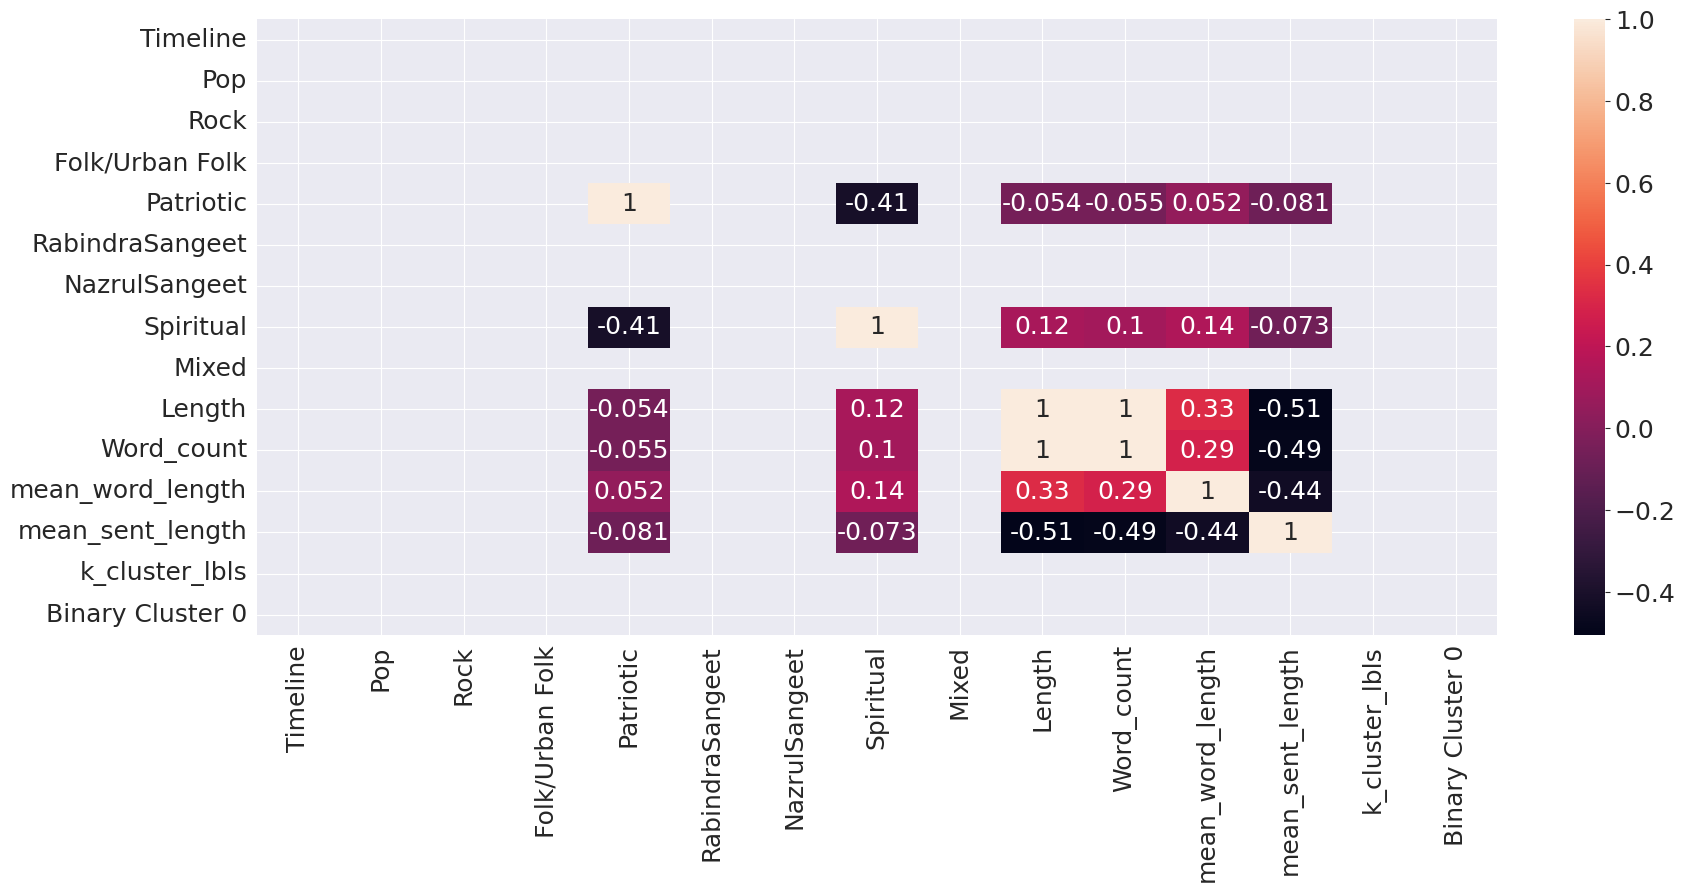

In [ ]:
plt.figure(figsize=(20, 8))
sns.heatmap((df[df['k_cluster_lbls'] == 5]).corr(), annot= True)

In [ ]:
df[df['k_cluster_lbls'] == 5].iloc[:,4:13]

Timeline  Pop  Rock  Folk/Urban Folk  Patriotic  RabindraSangeet  \
28         0    0     0                0          0                0   
29         0    0     0                0          0                0   
30         0    0     0                0          0                0   
31         0    0     0                0          0                0   
32         0    0     0                0          0                0   
33         0    0     0                0          0                0   
34         0    0     0                0          0                0   
35         0    0     0                0          0                0   
36         0    0     0                0          1                0   
37         0    0     0                0          1                0   
38         0    0     0                0          0                0   
39         0    0     0                0          0                0   
40         0    0     0                0          0                0   
41         0    0     0                0          0                0   
42         0    0     0                0          0                0   
43         0    0     0                0          0                0   
44         0    0     0                0          0                0   
45         0    0     0                0          1                0   
46         0    0     0                0          1                0   
47         0    0     0                0          0                0   
48         0    0     0                0          0                0   
49         0    0     0                0          0                0   
50         0    0     0                0          0                0   
51         0    0     0                0          0                0   
52         0    0     0                0          0                0   
53         0    0     0                0          0                0   
54         0    0     0                0          0                0   
55         0    0     0                0          0                0   
56         0    0     0                0          0                0   

    NazrulSangeet  Spiritual  Mixed  
28              1          0      0  
29              1          0      0  
30              1          0      0  
31              1          0      0  
32              1          1      0  
33              1          0      0  
34              1          1      0  
35              1          0      0  
36              1          0      0  
37              1          0      0  
38              1          1      0  
39              1          0      0  
40              1          1      0  
41              1          1      0  
42              1          1      0  
43              1          0      0  
44              1          1      0  
45              1          0      0  
46              1          0      0  
47              1          1      0  
48              1          1      0  
49              1          1      0  
50              1          1      0  
51              1          0      0  
52              1          0      0  
53              1          1      0  
54              1          1      0  
55              1          1      0  
56              1          1      0

GMM

In [ ]:
from sklearn.mixture import GaussianMixture #For GMM clustering

In [ ]:
features.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.23111077,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
def doGMM(X, nclust=2):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X.toarray())  # Convert sparse matrix to dense numpy array
    gmm_clust_lbls = model.predict(X.toarray())
    return (gmm_clust_lbls)

# Perform GMM clustering
gmm_labels = doGMM(features, nclust=2)

# Add GMM cluster labels to the DataFrame
df['gmm'] = gmm_labels

In [ ]:
df.head(5)

Artists Album name  \
0            Azam Khan    Ovimani   
1            Azam Khan        NaN   
2  Rabindranath Tagore        NaN   
3  Rabindranath Tagore        NaN   
4  Rabindranath Tagore        NaN   

                                            Title  \
0                           Bangladesh (বাংলাদেশ)   
1          Papri Keno Bojhena (পাপড়ি কেন বোঝে না)   
2  Abelay Jodi Esechho | অবেলায় যদি এসেছ আমার বনে   
3                 Abhishap Noy Noy | অভিশাপ নয় নয়   
4         Abhoy Dao To Boli | অভয় দাও তো বলি আমার   

                                              Lyrics  Timeline  Pop  Rock  \
0  রেললাইনের ঐ বস্তিতে\nজন্মেছিল একটি ছেলে\nমা তা...         0    1     1   
1  সারা রাত জেগে জেগে,\nকত কথাই আমি ভাবি।\nপাপড়ি ...         0    1     1   
2  অবেলায় যদি এসেছ আমার বনে দিনের বিদায়ক্ষণে\nগেয়...         0    0     0   
3  প্রকৃতি । অভিশাপ নয় নয়,\nঅভিশাপ নয় নয়-\nআনছে আ...         0    0     0   
4  অভয় দাও তো বলি আমার\nwish কী-\nএকটি ছটাক সোডার...         0    0     0   

   Folk/Urban Folk  Patriotic  RabindraSangeet  NazrulSangeet  Spiritual  \
0                0          1                0              0          0   
1                0          0                0              0          0   
2                0          0                1              0          0   
3                0          0                1              0          0   
4                0          0                1              0          0   

   Mixed  Length  Word_count  mean_word_length  mean_sent_length  \
0      0     500          83          5.000000        500.000000   
1      0     362          77          3.688312         50.857143   
2      0     455          93          3.903226        455.000000   
3      0     249          45          4.555556        249.000000   
4      0      73          16          3.625000         73.000000   

   k_cluster_lbls  agg_cluster_lbls  gmm  
0               6                 0    1  
1               6                 0    1  
2               4                 0    0  
3               4                 0    1  
4               4                 0    1

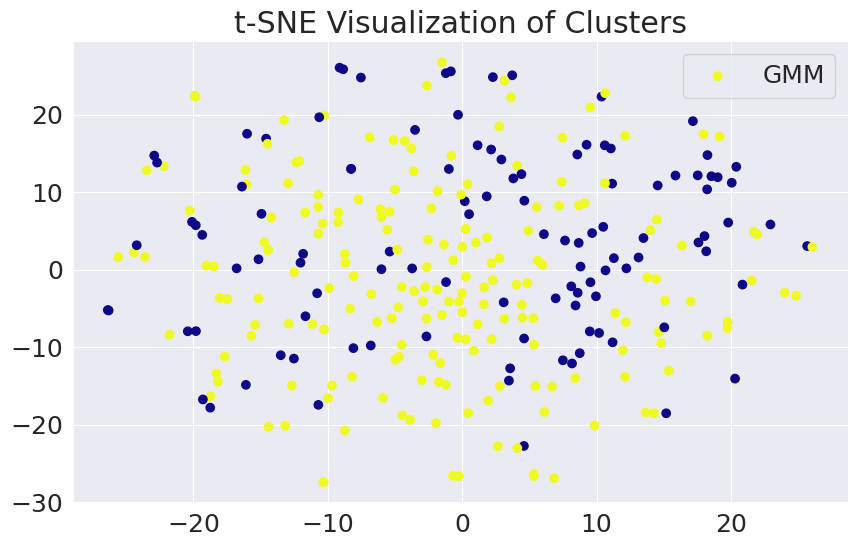

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Visualize using t-SNE
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
tsne_results = tsne.fit_transform(features.toarray())

# Plot t-SNE results
plt.figure(figsize=(10, 6))
# plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=k_cluster_lbls, cmap='viridis', marker='s', label='K-Means')
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=gmm_labels, cmap='plasma', marker='o', label='GMM')
plt.title('t-SNE Visualization of Clusters')
plt.legend()
plt.show()

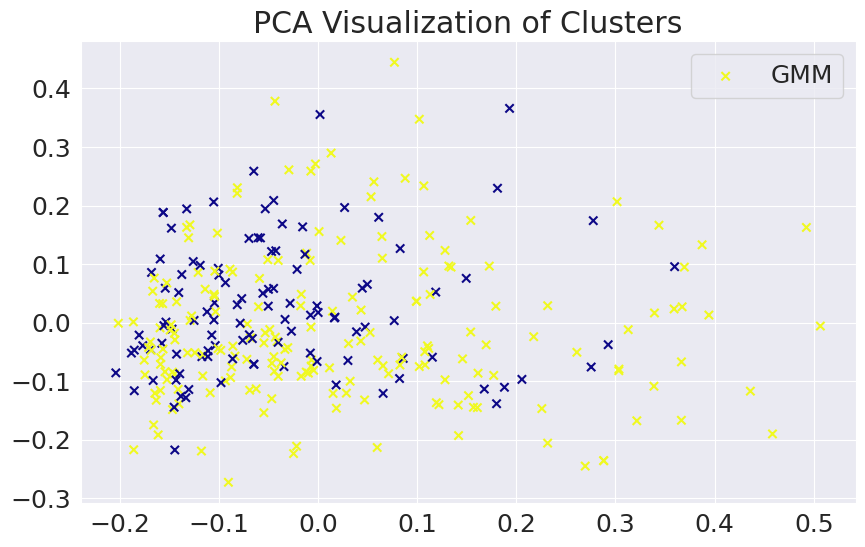

In [ ]:
# Visualize using PCA
pca = PCA(n_components=2, random_state=42)
pca_results = pca.fit_transform(features.toarray())

# Plot PCA results
plt.figure(figsize=(10, 6))
# plt.scatter(pca_results[:, 0], pca_results[:, 1], c=k_cluster_lbls, cmap='viridis', label='K-Means')
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=gmm_labels, cmap='plasma', marker='x', label='GMM')
plt.title('PCA Visualization of Clusters')
plt.legend()
plt.show()

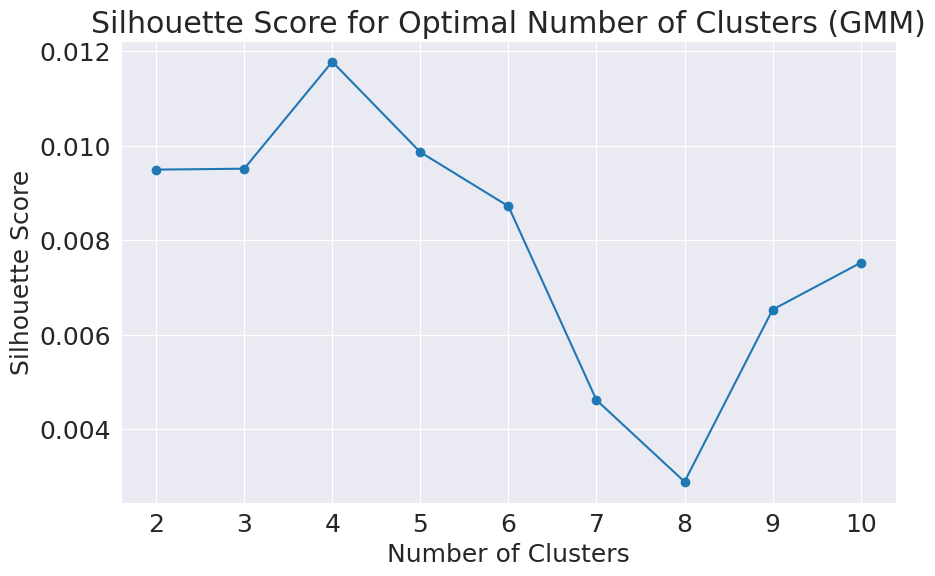

In [ ]:
# Calculate Silhouette scores for a range of cluster numbers with GMM
silhouette_scores_gmm = []
for n_clusters in range(2, 11):  # Adjust the range as needed
    gmm = GaussianMixture(n_components=n_clusters, init_params='kmeans')
    cluster_labels = gmm.fit_predict(features.toarray())
    silhouette_avg = silhouette_score(features.toarray(), cluster_labels)
    silhouette_scores_gmm.append(silhouette_avg)

# Plot Silhouette scores for GMM
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_gmm, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters (GMM)')
plt.show()

In [ ]:
# 3 clusters
def doGMM(X, nclust=3):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X.toarray())  # Convert sparse matrix to dense numpy array
    gmm_clust_lbls = model.predict(X.toarray())
    return (gmm_clust_lbls)

# Perform GMM clustering
gmm_labels = doGMM(features, nclust=3)

# Add GMM cluster labels to the DataFrame
df['gmm'] = gmm_labels

Agglomerative

In [ ]:
from sklearn.cluster import AgglomerativeClustering, AffinityPropagation #For clustering

In [ ]:
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_cluster_lbls = agg_clustering.fit_predict(features.toarray())

# Add Agglomerative cluster labels to the DataFrame
df['agg_cluster_lbls'] = agg_cluster_lbls

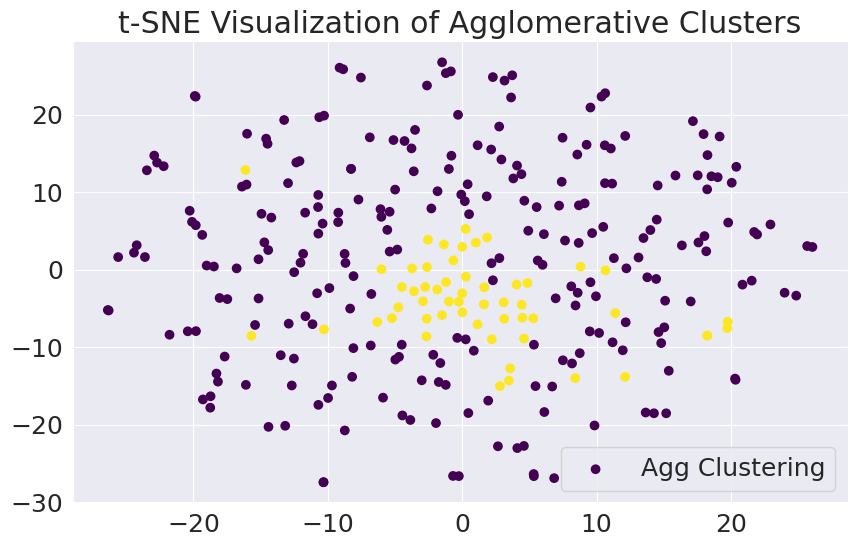

In [ ]:
# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
tsne_results = tsne.fit_transform(features.toarray())

# Plot t-SNE results with Agglomerative cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['agg_cluster_lbls'], cmap='viridis', marker='o', label='Agg Clustering')
plt.title('t-SNE Visualization of Agglomerative Clusters')
plt.legend()
plt.show()

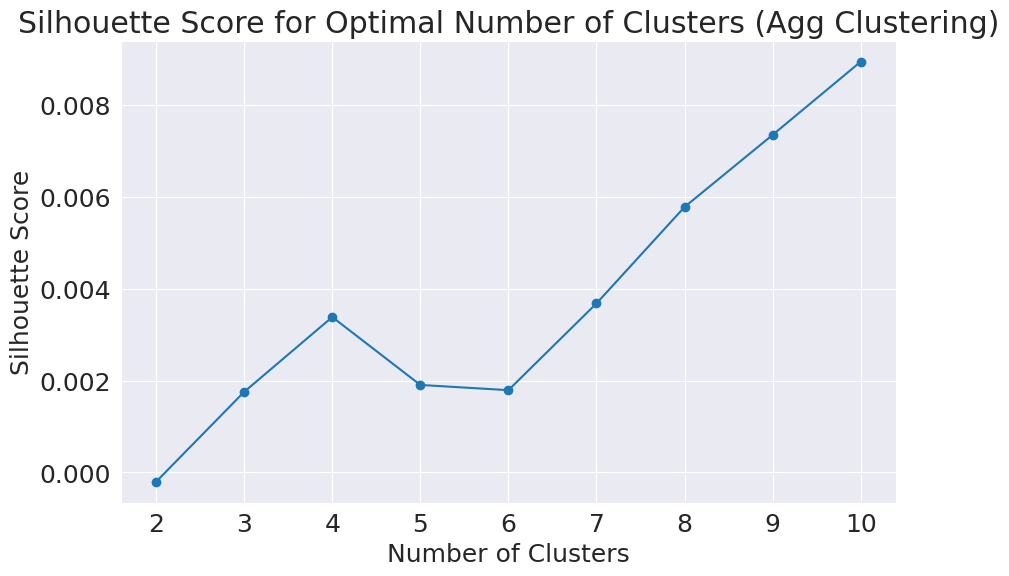

In [ ]:
# Calculate Silhouette scores for a range of cluster numbers with Agglomerative Clustering
silhouette_scores_agg = []
for n_clusters in range(2, 11):  # Adjust the range as needed
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agg_clustering.fit_predict(features.toarray())
    silhouette_avg = silhouette_score(features.toarray(), cluster_labels)
    silhouette_scores_agg.append(silhouette_avg)

# Plot Silhouette scores for Agglomerative Clustering
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_agg, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters (Agg Clustering)')
plt.show()

In [ ]:
# 10 clusters
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=10)
agg_cluster_lbls = agg_clustering.fit_predict(features.toarray())

# Add Agglomerative cluster labels to the DataFrame
df['agg_cluster_lbls'] = agg_cluster_lbls

In [ ]:
df.head()

Artists        Album name  \
34       Kazi Nazrul Islam               NaN   
298  Nachiketa Chakrabarty               NaN   
154           Momtaz Begum  Ami To More Jabo   
38       Kazi Nazrul Islam               NaN   
100                    LRB  Rim Jhim Brishti   

                                               Title  \
34   Ami Juge Juge Ashiyachi (আমি যুগে যুগে আসিয়াছি)   
298                  Mon Diye Lekhapora Kore Jei Jon   
154                                 Ami To More Jabo   
38                            Eider Chad (ঈদের চাঁদ)   
100                                     School Jibon   

                                                Lyrics  Timeline  Pop  Rock  \
34   আমি যুগে যুগে আসি, আসিয়াছি পুন মহাবিপ্লব হেতু\...         0  0.0     0   
298  মন দিয়ে লেখাপড়া করে যেই জন\nবড় হয়ে গাড়িঘোড়া চড়...         0  1.0     0   
154  আমি তো মরে যাব\nআমি তো মরে যাব, চলে যাব, রেখে ...         1  0.0     0   
38   সিঁড়ি-ওয়ালাদের দুয়ারে এসেছে আজ\nচাষা মজুর ও বি...         0  0.0     0   
100  প্রাইমারী শেষে আমরা সবে…উঠেছি হাই স্কুলে,\nপৃথ...         1  0.0     1   

     Folk/Urban Folk  Patriotic  RabindraSangeet  NazrulSangeet  Spiritual  \
34                 0          0                0              1        1.0   
298                1          0                0              0        0.0   
154                1          0                0              0        1.0   
38                 0          0                0              1        1.0   
100                0          0                0              0        0.0   

     Mixed  Length  Word_count  mean_word_length  mean_sent_length  \
34       0    3910         656          4.943598         91.857143   
298      1    2413         463          4.172786        184.384615   
154      1    2124         426          3.934272        235.111111   
38       0    2559         426          5.009390        120.904762   
100      1    2114         368          4.744565       1056.000000   

                                          Lyrics_lists  k_cluster_lbls  gmm  \
34   [আমি, যুগে, যুগে, আসি,, আসিয়াছি, পুন, মহাবিপ্ল...               1    0   
298  [মন, দিয়ে, লেখাপড়া, করে, যেই, জন, বড়, হয়ে, গাড়...               5    2   
154  [আমি, তো, মরে, যাব, আমি, তো, মরে, যাব,, চলে, য...               0    0   
38   [সিঁড়ি-ওয়ালাদের, দুয়ারে, এসেছে, আজ, চাষা, মজুর...               4    1   
100  [প্রাইমারী, শেষে, আমরা, সবে…উঠেছি, হাই, স্কুলে...               5    2   

     agg_cluster_lbls  
34                  7  
298                 3  
154                 7  
38                  4  
100                 3

DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_cluster_lbls = dbscan.fit_predict(features.toarray())

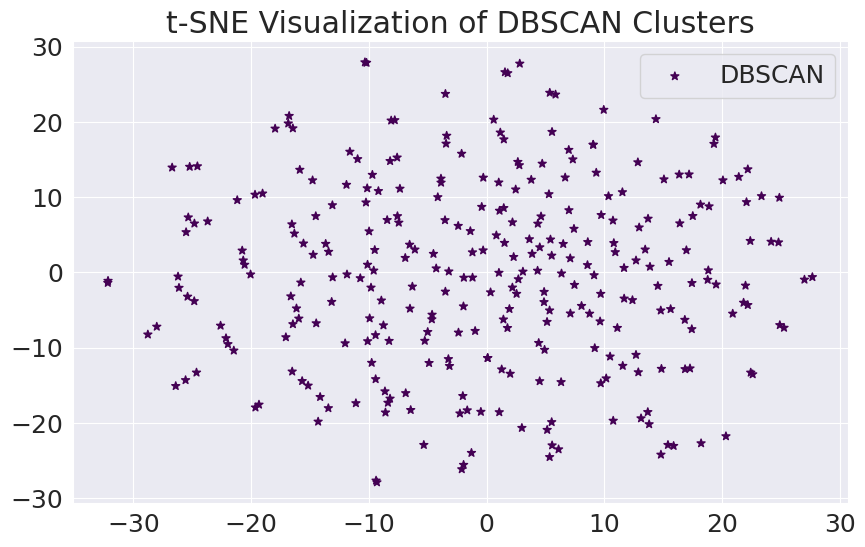

In [ ]:
# Add DBSCAN cluster labels to the DataFrame
df['dbscan_cluster_lbls'] = dbscan_cluster_lbls

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
tsne_results = tsne.fit_transform(features.toarray())

# Plot t-SNE results with DBSCAN cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['dbscan_cluster_lbls'], cmap='viridis', marker='*', label='DBSCAN')
plt.title('t-SNE Visualization of DBSCAN Clusters')
plt.legend()
plt.show()

XGBoost Classifier -Artist and Timeline prediction

In [ ]:
!pip install -q xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df.dtypes

Artists              object
Album name           object
Title                object
Lyrics               object
Timeline              int64
Pop                   int64
Rock                  int64
Folk/Urban Folk       int64
Patriotic             int64
RabindraSangeet       int64
NazrulSangeet         int64
Spiritual             int64
Mixed                 int64
Length                int64
Word_count            int64
mean_word_length    float64
mean_sent_length    float64
k_cluster_lbls        int32
agg_cluster_lbls      int64
gmm                   int64
dtype: object

In [ ]:
X = features.toarray()
y = df['Timeline']

In [ ]:
len(X),len(y)

(299, 299)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

224 224
75 75


In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [ ]:
from sklearn.metrics import accuracy_score
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.00%


In [ ]:
from xgboost import plot_tree

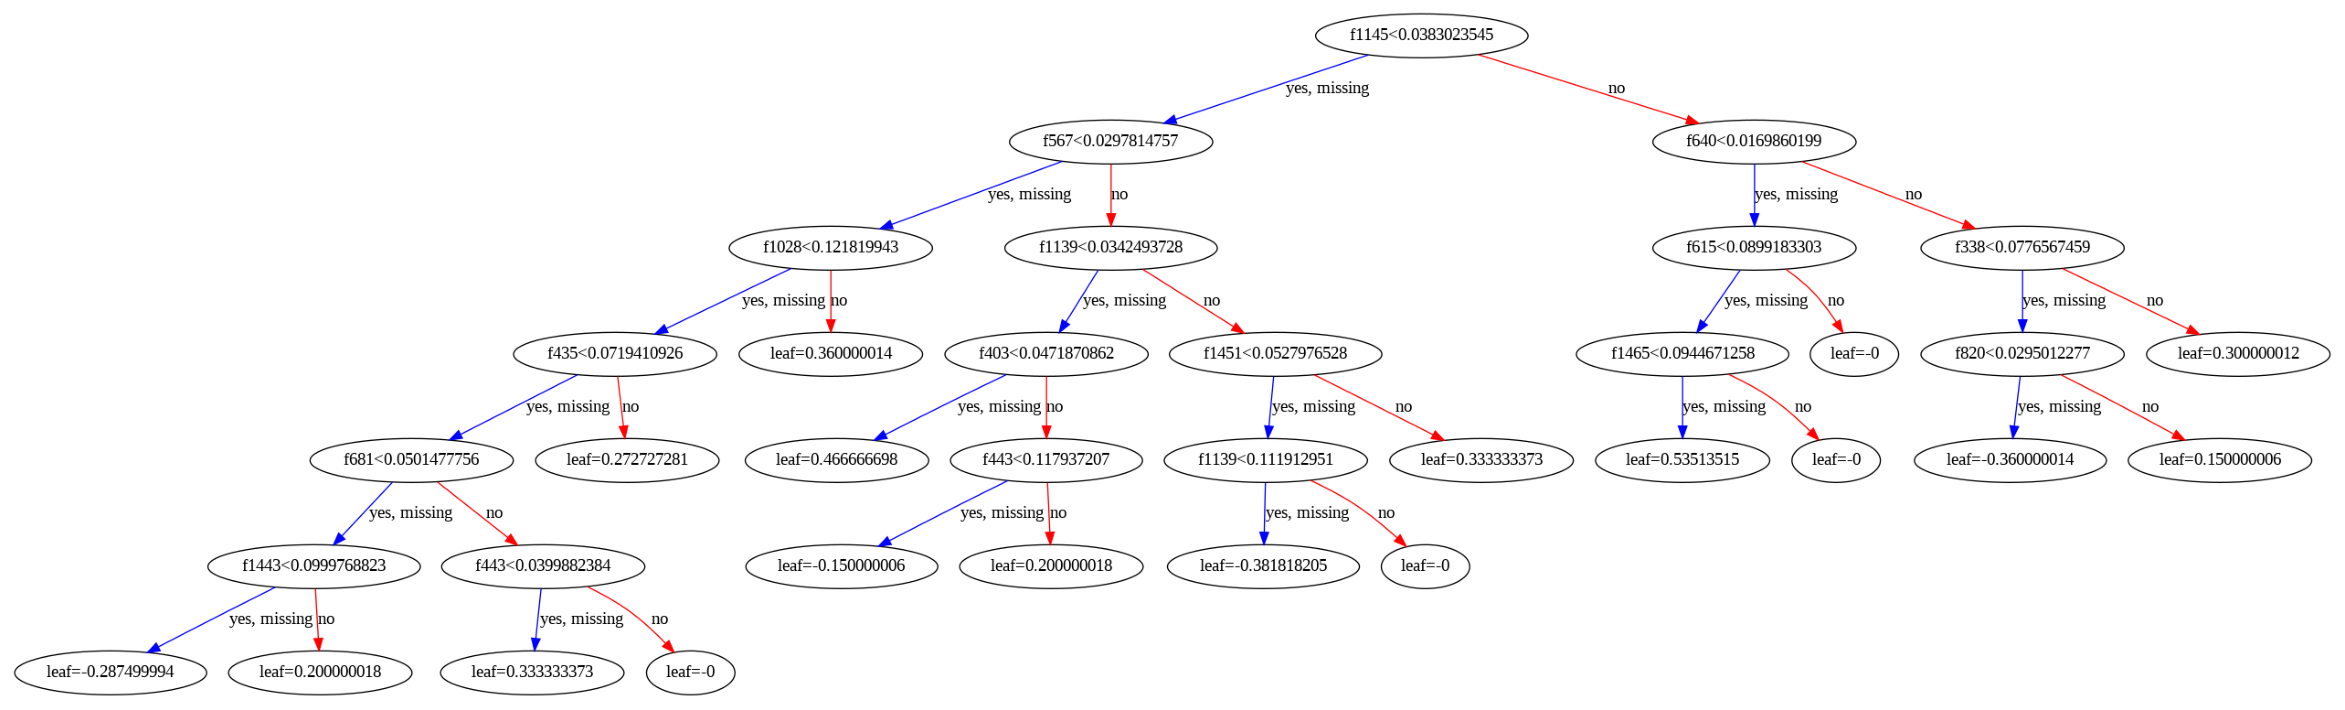

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
# plot single tree
plot_tree(model, ax=ax)
plt.show()

<Axes: >

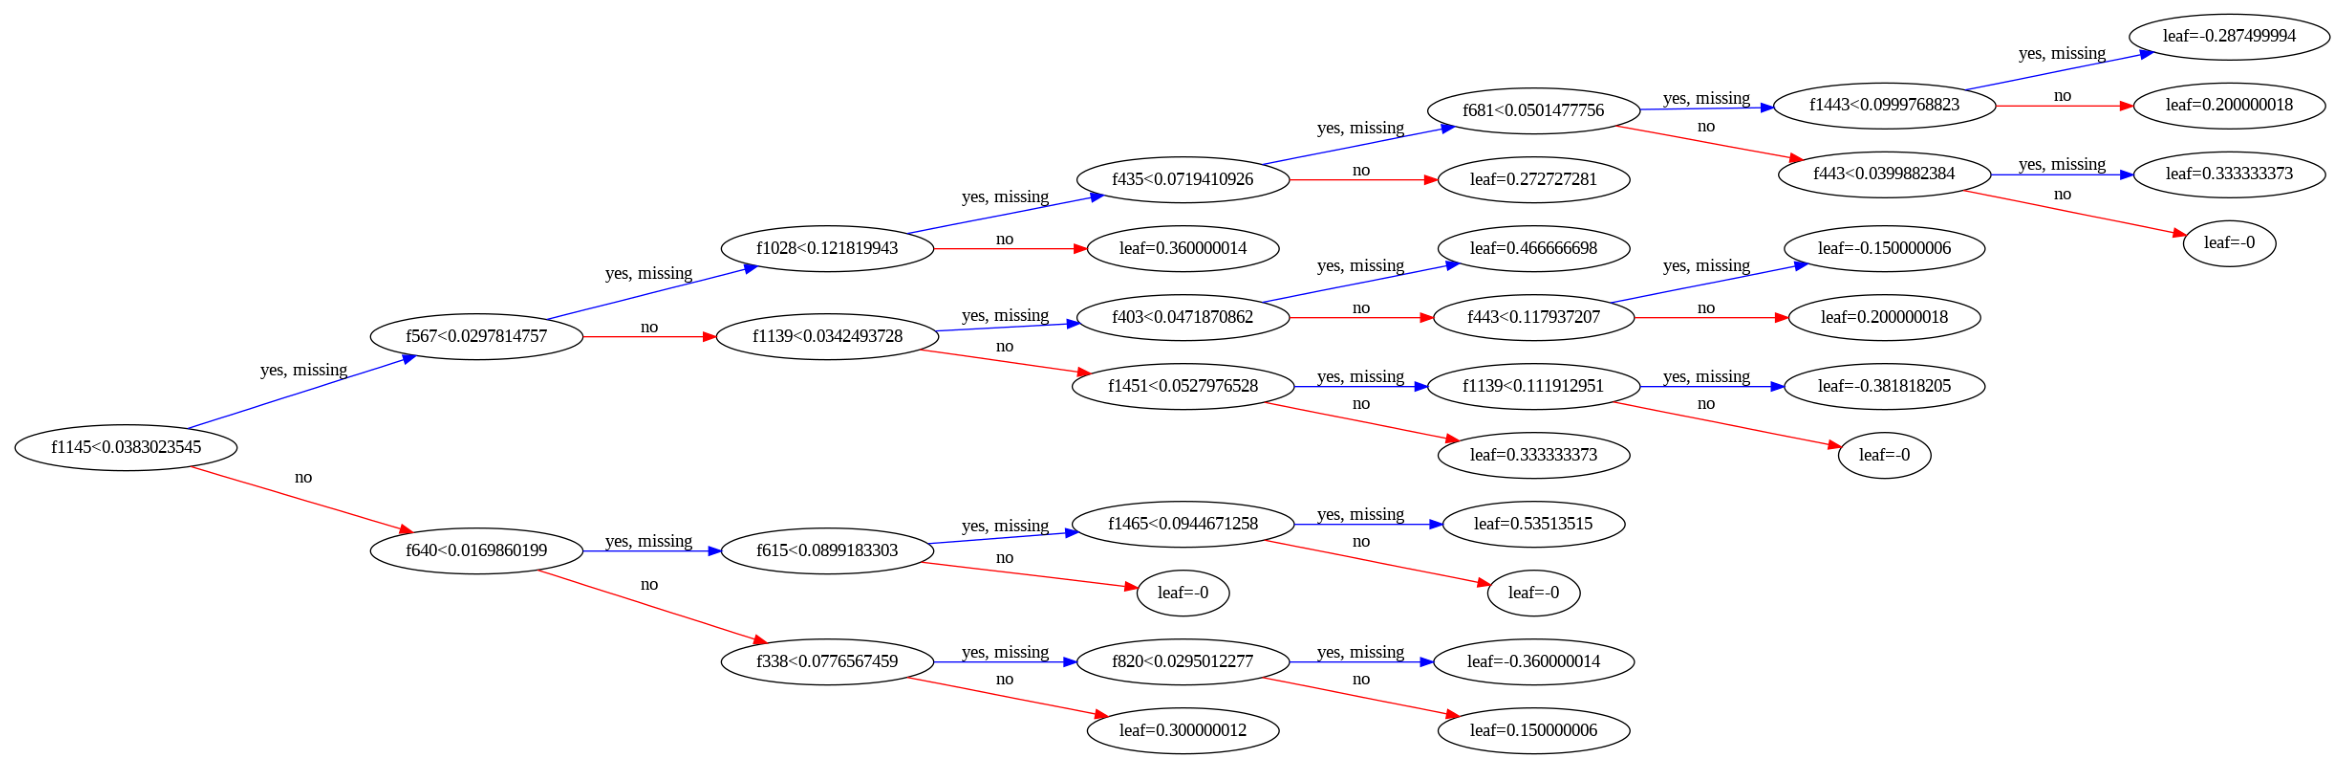

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(model, num_trees=0, rankdir='LR', ax=ax)